**Introduction:**

The goal of this project is to programmatically retrieve and analyze e-commerce data using an API that offers a comprehensive record of platform transactions. This dataset includes key details such as customer demographics, product information, seller profiles, payment methods, order timelines, and customer reviews. Utilizing Python’s requests library, the data will be fetched, structured, and prepared for analysis. It will then be loaded into a DataFrame using pandas to facilitate exploration and processing. This project aims to uncover insights into customer behavior, product performance, seller efficiency, and overall operational trends. By adopting an API-based approach, the project ensures dynamic and up-to-date access to critical business insights.

In [ ]:
# Customer Demographics --> Name, Age, Occupation, State,....
# Product Demographics --> Name, When it was manufacured?, Expiry Date

**Information about Data**

**Access Data using API**
API Endpoint - http://4.186.26.27:8787/

List of all tables -

http://4.186.26.27:8787/ecommerce_tables

Individual Data -

http://4.186.26.27:8787/ecommerce?dataset={table}

-- Part of Endpoint : http://4.186.26.27:8787/ecommerce
-- ? --> parameters (Parameters of functions /input)


**Customer Information**

Captures demographic details like city, state, and ZIP code prefix.

Includes unique identifiers for individual and aggregated customer analyses.


**Order Details**

Tracks order placement, approval, and delivery timelines.

Provides shipping costs (freight_value) and order statuses.



**Product Details**

Covers product categories, dimensions, and visual content (e.g., photo count).

Includes descriptive attributes like name length and description length.

**Seller Information**

Provides the seller's location details, enabling geographical analysis of sellers.

**Payment Information**


Documents payment methods and transaction details (e.g., installments, total payment).


**Review Feedback**

Includes customer feedback with scores and optional textual comments.

In [ ]:
# Data through API - Application programming interface

# 1. Understand the API Endpoint
# APIs expose specific URLs called endpoints where you can request data. For example:
# https://api.example.com/orders

# 2. Authentication (if required)
# Many APIs need an API key or token. You usually pass this as a header or query parameter.
# Example: https://api.example.com/orders?api_key=YOUR_API_KEY

# 3. Make the Request, test it and integrate.
# Use tools like:
# Python's requests library :
# Postman (for testing APIs) : https://www.postman.com/downloads/


# 4. Load into a DataFrame
# Use Python to convert the response into a format you can analyze:
# import requests
# import pandas as pd

# response = requests.get("https://api.example.com/orders", headers={"Authorization": "Bearer YOUR_API_KEY"})
# data = response.json()
# df = pd.DataFrame(data)


# ✅ Why APIs Matter in Analytics

# Real-time or near-real-time data
# No need to download CSVs manually
# Easy integration with dashboards and automation scripts


In [ ]:
pip install requests #

In [ ]:
# Import Librairies

import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# Base URL of the Flask application - API
BASE_URL = "http://4.186.26.27:8787"
pd.set_option('display.max_columns', None) # None --> All Columns
pd.set_option('display.max_rows', 1000)

In [ ]:
# Set visualization styles
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
response = requests.get("http://4.186.26.27:8787/ecommerce_tables") # API is executed successfully

In [ ]:
response # Status code

<Response [200]>

In [ ]:
response.json() # View of data as Json

[{'tables': ['customers',
   'geolocation',
   'order_items',
   'order_payments',
   'order_reviews',
   'orders',
   'product_category_names',
   'products',
   'sellers']}]

In [ ]:
response.status_code

200

In [ ]:
# Converting data to Dataframe
pd.DataFrame(response.json())

,tables
0,"[customers, geolocation, order_items, order_pa..."


In [ ]:
response.json()[0]

{'tables': ['customers',
  'geolocation',
  'order_items',
  'order_payments',
  'order_reviews',
  'orders',
  'product_category_names',
  'products',
  'sellers']}

In [ ]:
pd.DataFrame(response.json()[0])

,tables
0,customers
1,geolocation
2,order_items
3,order_payments
4,order_reviews
5,orders
6,product_category_names
7,products
8,sellers


In [ ]:
# Table created as dataframe - sellers
response = requests.get("hhttp://4.186.26.27:8787/ecommerce?dataset=sellers") # API is executed successfully
response.status_code

200

In [ ]:
# http://4.186.26.27:8787/ecommerce?dataset=sellers

In [ ]:
# response.json()

In [ ]:
# Convert Seller data to DataFrame
seller_df = pd.DataFrame(response.json())

In [ ]:
seller_df.head()

,seller_city,seller_id,seller_state,seller_zip_code_prefix
0,campinas,3442f8959a84dea7ee197c632cb2df15,SP,13023
1,mogi guacu,d1b65fc7debc3361ea86b5f14c68d2e2,SP,13844
2,rio de janeiro,ce3ad9de960102d0677a81f5d0bb7b2d,RJ,20031
3,sao paulo,c0f3eea2e14555b6faeea3dd58c1b1c3,SP,4195
4,braganca paulista,51a04a8a6bdcb23deccc82b0b80742cf,SP,12914


In [ ]:
# List of all tables

response = requests.get(f"{BASE_URL}/ecommerce_tables")

print("Response Code - ",response) # Status but can't be used for any condition
# print()
print("Employees Data - ",response.json())
# print()
print("Status Code - ", response.status_code) # Status :Data can be used for Condition or logic

Response Code -  <Response [200]>
Employees Data -  [{'tables': ['customers', 'geolocation', 'order_items', 'order_payments', 'order_reviews', 'orders', 'product_category_names', 'products', 'sellers']}]
Status Code -  200


In [ ]:
# Status Code	Description -- Universal
# 200 OK	The request was successful. --> Get
# 201 Created	- New resource was successfully created. --> Post, Put, Patch

# API is running but request doesn't align with the construct
# 404 Not Found	The requested resource doesn’t exist.
# 400 Bad Request	The request was invalid (e.g., missing fields).

# API is not running.
# 500 Internal Server Error	The server encountered an error.

# Status Codes defined by USer creating the APIs -->

In [ ]:
BASE_URL

'http://4.186.26.27:8787'

In [ ]:
# Fetch data
def data_fetch(base_url,dataset):
  try:
    df = pd.DataFrame(requests.get(f"{base_url}/ecommerce?dataset={dataset}").json())
    return df
  except:
    print(f'Error in fetching Dataset - {dataset}')


### Fetching Data

In [ ]:
# fetch customer data
customers_df = data_fetch(base_url = BASE_URL,dataset = 'customers')
customers_df.head()

,customer_city,customer_id,customer_state,customer_unique_id,customer_zip_code_prefix
0,franca,06b8999e2fba1a1fbc88172c00ba8bc7,SP,861eff4711a542e4b93843c6dd7febb0,14409
1,sao bernardo do campo,18955e83d337fd6b2def6b18a428ac77,SP,290c77bc529b7ac935b93aa66c333dc3,9790
2,sao paulo,4e7b3e00288586ebd08712fdd0374a03,SP,060e732b5b29e8181a18229c7b0b2b5e,1151
3,mogi das cruzes,b2b6027bc5c5109e529d4dc6358b12c3,SP,259dac757896d24d7702b9acbbff3f3c,8775
4,campinas,4f2d8ab171c80ec8364f7c12e35b23ad,SP,345ecd01c38d18a9036ed96c73b8d066,13056


In [ ]:
# fetch geolocation data
geolocation_df = data_fetch(base_url = BASE_URL,dataset = 'geolocation')
geolocation_df.head()

,geolocation_city,geolocation_lat,geolocation_lng,geolocation_state,geolocation_zip_code_prefix
0,sao paulo,-23.545621,-46.639292,SP,1037
1,sao paulo,-23.546081,-46.644820,SP,1046
2,sao paulo,-23.546129,-46.642951,SP,1046
3,sao paulo,-23.544392,-46.639499,SP,1041
4,sao paulo,-23.541578,-46.641607,SP,1035


In [ ]:
# fetch order items
orderitems_df=data_fetch(base_url = BASE_URL,dataset = 'order_items')
orderitems_df.head()

,freight_value,order_id,order_item_id,price,product_id,seller_id,shipping_limit_date
0,13.29,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35
1,19.93,00018f77f2f0320c557190d7a144bdd3,1,239.90,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13
2,17.87,000229ec398224ef6ca0657da4fc703e,1,199.00,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30
3,12.79,00024acbcdf0a6daa1e931b038114c75,1,12.99,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18
4,18.14,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51


In [ ]:
# fetch order payments
orderpayments_df = data_fetch(base_url = BASE_URL,dataset = 'order_payments')
orderpayments_df.head()

,order_id,payment_installments,payment_sequential,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,8,1,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,1,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,1,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,8,1,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,2,1,credit_card,128.45


In [ ]:
# fetch order reviews
orderreviews_df = data_fetch(base_url = BASE_URL,dataset = 'order_reviews')
orderreviews_df.head()

,order_id,review_answer_timestamp,review_comment_message,review_comment_title,review_creation_date,review_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,2018-01-18 21:46:59,null,null,2018-01-18 00:00:00,7bc2406110b926393aa56f80a40eba40,4
1,a548910a1c6147796b98fdf73dbeba33,2018-03-11 03:05:13,null,null,2018-03-10 00:00:00,80e641a11e56f04c1ad469d5645fdfde,5
2,f9e4b658b201a9f2ecdecbb34bed034b,2018-02-18 14:36:24,null,null,2018-02-17 00:00:00,228ce5500dc1d8e020d8d1322874b6f0,5
3,658677c97b385a9be170737859d3511b,2017-04-21 22:02:06,Recebi bem antes do prazo estipulado.,null,2017-04-21 00:00:00,e64fb393e7b32834bb789ff8bb30750e,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,2018-03-02 10:26:53,Parabéns lojas lannister adorei comprar pela I...,null,2018-03-01 00:00:00,f7c4243c7fe1938f181bec41a392bdeb,5


In [ ]:
# fetch order data
orders_df = data_fetch(base_url = BASE_URL,dataset = 'orders')
orders_df.head()

,customer_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_purchase_timestamp,order_status
0,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,delivered
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,delivered
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,delivered
3,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,delivered
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,delivered


In [ ]:
# fetch product category name data
productcategoryname_df = data_fetch(base_url = BASE_URL,dataset = 'product_category_names')
productcategoryname_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
# fetch product details
products_df = data_fetch(base_url = BASE_URL,dataset = 'products')
products_df.head()

,product_category_name,product_description_lenght,product_height_cm,product_id,product_length_cm,product_name_lenght,product_photos_qty,product_weight_g,product_width_cm
0,perfumaria,287.0,10.0,1e9e8ef04dbcff4541ed26657ea517e5,16.0,40.0,1.0,225.0,14.0
1,artes,276.0,18.0,3aa071139cb16b67ca9e5dea641aaa2f,30.0,44.0,1.0,1000.0,20.0
2,esporte_lazer,250.0,9.0,96bd76ec8810374ed1b65e291975717f,18.0,46.0,1.0,154.0,15.0
3,bebes,261.0,4.0,cef67bcfe19066a932b7673e239eb23d,26.0,27.0,1.0,371.0,26.0
4,utilidades_domesticas,402.0,17.0,9dc1a7de274444849c219cff195d0b71,20.0,37.0,4.0,625.0,13.0


In [ ]:
#fetch sellers data
sellers_df = data_fetch(base_url = BASE_URL,dataset = 'sellers')
sellers_df.head()

,seller_city,seller_id,seller_state,seller_zip_code_prefix
0,campinas,3442f8959a84dea7ee197c632cb2df15,SP,13023
1,mogi guacu,d1b65fc7debc3361ea86b5f14c68d2e2,SP,13844
2,rio de janeiro,ce3ad9de960102d0677a81f5d0bb7b2d,RJ,20031
3,sao paulo,c0f3eea2e14555b6faeea3dd58c1b1c3,SP,4195
4,braganca paulista,51a04a8a6bdcb23deccc82b0b80742cf,SP,12914


#### Column Descriptions

- **customer_id**: Unique identifier for each customer.
- **order_approved_at**: Timestamp when the order was approved.
- **order_delivered_carrier_date**: Date when the order was delivered to the carrier.
- **order_delivered_customer_date**: Date when the order was delivered to the customer.
- **order_estimated_delivery_date**: Estimated delivery date for the order.
- **order_id**: Unique identifier for each order.
- **order_purchase_timestamp**: Timestamp when the order was placed.
- **order_status**: Status of the order (e.g., delivered, canceled, pending).
- **freight_value**: Shipping cost for the order.
- **order_item_id**: Identifier for the order item within a specific order.
- **price**: Price of the product in the order item.
- **product_id**: Unique identifier for each product.
- **seller_id**: Unique identifier for each seller.
- **shipping_limit_date**: Deadline for the seller to dispatch the order.
- **payment_installments**: Number of installments for payment.
- **payment_sequential**: Sequential number of the payment transaction.
- **payment_type**: Payment method used (e.g., credit card, boleto).
- **payment_value**: Total payment value for the order.
- **review_answer_timestamp**: Timestamp when the review was responded to by the company.
- **review_comment_message**: Text of the customer review comment.
- **review_comment_title**: Title of the review comment.
- **review_creation_date**: Date when the review was created.
- **review_id**: Unique identifier for each review.
- **review_score**: Rating given by the customer (e.g., 1 to 5).
- **product_category_name**: Category of the product (e.g., electronics, furniture).
- **product_description_lenght**: Length of the product description.
- **product_height_cm**: Height of the product in centimeters.
- **product_length_cm**: Length of the product in centimeters.
- **product_name_lenght**: Length of the product name.
- **product_photos_qty**: Number of photos associated with the product.
- **product_weight_g**: Weight of the product in grams.
- **product_width_cm**: Width of the product in centimeters.
- **customer_city**: City of the customer.
- **customer_state**: State of the customer.
- **customer_unique_id**: Unique identifier for each customer (different from `customer_id` for aggregated analysis).
- **customer_zip_code_prefix**: ZIP code prefix of the customer.
- **seller_city**: City of the seller.
- **seller_state**: State of the seller.
- **seller_zip_code_prefix**: ZIP code prefix of the seller.


# **OBJECTIVE**

**Delivery Performance:**

"How does the delivery experience impact customer satisfaction?"
Let’s analyze the data to understand what delivery-related factors make customers happy or unhappy and how it can be improved

In [ ]:
# Who is going to look at your analysis?
# Understand the stakeholder --> CEO/ CXOs
# Delivery Experience impact Customer Satisfaction
# Understand their pain points and potential questions which they are ask.

## **🧠 Analytical Thought Process  – Step-by-Step:**

### **✅ Step 1: Think Like a Customer | Research| Understand the problem statement**

Ask:

"What annoys me most when I order online?"

Your answer:

1. Late delivery

2. Unexpected shipping charges

3. No updates or delays

4. Wrong product or damaged package

👉 These thoughts help translate customer pain points into data columns we can analyze.

Factors affecting the customer journey resulting to satifaction | hypothesis

### **✅ Step 2: Connect Experience/Factors to Data**

Map your personal experience to actual data fields:

Real-life Experience	--> Data Column(s) Used
- Delivery took too long--> `order_delivered_customer_date`, `order_approved_at`
- Delivered after expected date	--> `order_estimated_delivery_date`, `order_delivered_customer_date`
- Paid too much for shipping -->	`freight_value`
- Seller took too long to ship --> `shipping_limit_date`, `order_approved_at`
- Customer gave a low rating	--> `review_score`

-- Where these information are present? How Merging should be done?

### **✅ Step 3: Define What You Want to Analyze Ask:**

“What specific questions can I answer with this data? - Aligned to objective | which stakeholders might want to know and take action on it.”

Form simple but impactful questions like:

1. Are customers less satisfied when delivery is late?

2. Which states or cities have the most delayed deliveries?

3. Do orders with higher freight value get lower review scores?

4. Are sellers in some locations consistently faster or slower?

Start Defining questions which stakeholders might want to hear.

### **✅ Step 4: Prepare the Data to Tell the Story Help calculate new fields that are needed for analysis:**


```
Actual Delivery Time = order_delivered_customer_date - order_approved_at

Delay vs. Estimate = order_delivered_customer_date - order_estimated_delivery_date

Processing Time = order_approved_at - order_purchase_timestamp
```



### **✅ Step 5: Visualize Patterns and Spot Trends:**

1. Bar charts showing average review scores by delivery delay

2. Box plots comparing freight value and review scores

3. Heatmaps of delivery delays across different states

4. Time trends in customer satisfaction over months

### **✅ Step 6: Conclude with Insights**

Ask:

1. What factors seem to affect customer satisfaction the most?

2. What delivery practices lead to higher review scores?

3. How can this help the business improve customer experience?



### Structuring Thoughts in Action

##### ✅ Step 3: Define What You Want to Analyze:


In [ ]:
# Establish the problem -->
# Delivery Process vs Customer Review
# 1. Delivery Delay by Customer Review
# 2. Processing Time and Review
# 3. Freight Value vs Review Score | Freight Value --> shipping cost

# Core Outcomes (KI) of delivery process --> Amount to pay, Time to process, Delay

# Causes of Problem -->
# 1. Specific seller vs Delivery delay | Processing Time | Freight Value
# 2. Specific Customer city vs Delivery Delay | Processing Time | Freight Value
# 3. Specific Product vs Delivery Delay | Processing Time | Freight Value
# Core outomes depends upon --> Specific Stakeholders/ factors | seller, City,product ....


##### ✅ Step 4: Prepare the Data to Tell the Story Help calculate new fields that are needed for analysis:

In [ ]:
# Filters -->
# Only Orders which are delivered
# full data --> no time filter

# Define these columns
# Delivery Delay --> Order_delivered - order_delivery_estimated | value + Categorised
# Customer Review | value + Categorised
# Processing Time --> order Purchased - Order approved | Time takes to approve the order | inventory check | Location
# Freight Value
# Seller info
# Customer Info
# Product Info

In [ ]:
# Reason of categorising
# 1. Analysing Categories are easy | More interpretable vs direct value

### Data Preparation

In [ ]:
# dir()

In [ ]:
# Merging Dataframes
# Base table -> which has the most information? --> orders_df
df = orders_df.merge(orderitems_df, on='order_id', how='inner')
df = df.merge(orderpayments_df, on='order_id', how='inner')
df = df.merge(orderreviews_df, on='order_id', how='inner')
df = df.merge(products_df, on='product_id', how='inner')
df = df.merge(customers_df, on='customer_id', how='inner')
df = df.merge(sellers_df, on='seller_id', how='inner')

# left join or inner join -->
# Analysis --> Do you need to all information of left table?
# Customer table --> Orders Table | left join -->
# Output : All customers and orders done |
# there will be few customers with 0 Order | NA |
# If you are interested in analysing these 0 order customer as well..

#  Customer table --> Orders Table | inner join
# Output : all the matching data will be present
# I am not interested in customer with 0 order.

In [ ]:
df.columns

Index(['customer_id', 'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_id', 'order_purchase_timestamp', 'order_status', 'freight_value',
       'order_item_id', 'price', 'product_id', 'seller_id',
       'shipping_limit_date', 'payment_installments', 'payment_sequential',
       'payment_type', 'payment_value', 'review_answer_timestamp',
       'review_comment_message', 'review_comment_title',
       'review_creation_date', 'review_id', 'review_score',
       'product_category_name', 'product_description_lenght',
       'product_height_cm', 'product_length_cm', 'product_name_lenght',
       'product_photos_qty', 'product_weight_g', 'product_width_cm',
       'customer_city', 'customer_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'seller_city', 'seller_state',
       'seller_zip_code_prefix'],
      dtype='object')

In [ ]:
df.head()

,customer_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_purchase_timestamp,order_status,freight_value,order_item_id,price,product_id,seller_id,shipping_limit_date,payment_installments,payment_sequential,payment_type,payment_value,review_answer_timestamp,review_comment_message,review_comment_title,review_creation_date,review_id,review_score,product_category_name,product_description_lenght,product_height_cm,product_length_cm,product_name_lenght,product_photos_qty,product_weight_g,product_width_cm,customer_city,customer_state,customer_unique_id,customer_zip_code_prefix,seller_city,seller_state,seller_zip_code_prefix
0,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,delivered,8.72,1,29.99,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,1,1,credit_card,18.12,2017-10-12 03:43:48,"Não testei o produto ainda, mas ele veio corre...",null,2017-10-11 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,utilidades_domesticas,268.0,8.0,19.0,40.0,4.0,500.0,13.0,sao paulo,SP,7c396fd4830fd04220f754e42b4e5bff,3149,maua,SP,9350
1,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,delivered,8.72,1,29.99,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,1,3,voucher,2.00,2017-10-12 03:43:48,"Não testei o produto ainda, mas ele veio corre...",null,2017-10-11 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,utilidades_domesticas,268.0,8.0,19.0,40.0,4.0,500.0,13.0,sao paulo,SP,7c396fd4830fd04220f754e42b4e5bff,3149,maua,SP,9350
2,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,delivered,8.72,1,29.99,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,1,2,voucher,18.59,2017-10-12 03:43:48,"Não testei o produto ainda, mas ele veio corre...",null,2017-10-11 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,utilidades_domesticas,268.0,8.0,19.0,40.0,4.0,500.0,13.0,sao paulo,SP,7c396fd4830fd04220f754e42b4e5bff,3149,maua,SP,9350
3,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,delivered,22.76,1,118.70,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,1,1,boleto,141.46,2018-08-08 18:37:50,Muito bom o produto.,Muito boa a loja,2018-08-08 00:00:00,8d5266042046a06655c8db133d120ba5,4,perfumaria,178.0,13.0,19.0,29.0,1.0,400.0,19.0,barreiras,BA,af07308b275d755c9edb36a90c618231,47813,belo horizonte,SP,31570
4,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,delivered,19.22,1,159.90,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,3,1,credit_card,179.12,2018-08-22 19:07:58,null,null,2018-08-18 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,automotivo,232.0,19.0,24.0,46.0,1.0,420.0,21.0,vianopolis,GO,3a653a41f6f9fc3d2a113cf8398680e8,75265,guariba,SP,14840


In [ ]:
# Free up Space [Important]
del orderitems_df,orderpayments_df

In [ ]:
key_columns = ['customer_id', 'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_id', 'order_purchase_timestamp', 'order_status', 'freight_value',
       'order_item_id', 'price', 'product_id', 'seller_id',
       'shipping_limit_date',
       'payment_type', 'review_score',
       'product_category_name',
       'customer_city', 'customer_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'seller_city', 'seller_state',
       'seller_zip_code_prefix']

# Imp - We will never drop Ids which can be relevant later |
# 1. Important for merging , if required later
# 2. IDs are important to identify because these are uniques. [Unique Count]

In [ ]:
df_subset = df[key_columns]
# Dealing with Relevant Columns
# Operations are Faster as well less space is consumed.

In [ ]:
df_subset.head(10)

,customer_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_purchase_timestamp,order_status,freight_value,order_item_id,price,product_id,seller_id,shipping_limit_date,payment_type,review_score,product_category_name,customer_city,customer_state,customer_unique_id,customer_zip_code_prefix,seller_city,seller_state,seller_zip_code_prefix
0,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,delivered,8.72,1,29.99,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,credit_card,4,utilidades_domesticas,sao paulo,SP,7c396fd4830fd04220f754e42b4e5bff,3149,maua,SP,9350
1,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,delivered,8.72,1,29.99,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,voucher,4,utilidades_domesticas,sao paulo,SP,7c396fd4830fd04220f754e42b4e5bff,3149,maua,SP,9350
2,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,delivered,8.72,1,29.99,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,voucher,4,utilidades_domesticas,sao paulo,SP,7c396fd4830fd04220f754e42b4e5bff,3149,maua,SP,9350
3,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,delivered,22.76,1,118.70,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,boleto,4,perfumaria,barreiras,BA,af07308b275d755c9edb36a90c618231,47813,belo horizonte,SP,31570
4,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,delivered,19.22,1,159.90,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,credit_card,5,automotivo,vianopolis,GO,3a653a41f6f9fc3d2a113cf8398680e8,75265,guariba,SP,14840
5,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,delivered,27.20,1,45.00,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,credit_card,5,pet_shop,sao goncalo do amarante,RN,7c142cf63193a1473d2e66489a9ae977,59296,belo horizonte,MG,31842
6,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,delivered,8.72,1,19.90,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,credit_card,5,papelaria,santo andre,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195,mogi das cruzes,SP,8752
7,503740e9ca751ccdda7ba28e9ab8f608,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,a4591c265e18cb1dcee52889e2d8acc3,2017-07-09 21:57:05,delivered,27.36,1,147.90,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,credit_card,4,automotivo,congonhinhas,PR,80bb27c7c16e8f973207a5086ab329e2,86320,guarulhos,SP,7112
8,ed0271e0b7da060a393796590e7b737a,2017-04-13 13:25:17,null,null,2017-05-09 00:00:00,136cce7faa42fdb2cefd53fdc79a6098,2017-04-11 12:22:08,invoiced,16.05,1,49.90,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,credit_card,2,null,santa rosa,RS,36edbb3fb164b1f16485364b6fb04c73,98900,sao paulo,SP,5455
9,9bdf08b4b3b52b5526ff42d37d47f222,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,6514b8ad8028c9f2cc2374ded245783f,2017-05-16 13:10:30,delivered,15.17,1,59.99,4520766ec412348b8d4caa5e8a18c464,16090f2ca

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    117329 non-null  object 
 1   order_approved_at              117329 non-null  object 
 2   order_delivered_carrier_date   117329 non-null  object 
 3   order_delivered_customer_date  117329 non-null  object 
 4   order_estimated_delivery_date  117329 non-null  object 
 5   order_id                       117329 non-null  object 
 6   order_purchase_timestamp       117329 non-null  object 
 7   order_status                   117329 non-null  object 
 8   freight_value                  117329 non-null  float64
 9   order_item_id                  117329 non-null  int64  
 10  price                          117329 non-null  float64
 11  product_id                     117329 non-null  object 
 12  seller_id                     

##### Data Cleaning

In [ ]:
# Filtering Out | df_subset --> Rows

In [ ]:
df_subset['order_status'].value_counts()

,count
order_status,
delivered,114859
shipped,1167
canceled,553
invoiced,370
processing,370
unavailable,7
approved,3


In [ ]:
df_subset = df_subset.loc[df_subset['order_status'] == 'delivered' ]
df_subset.shape

(114859, 24)

In [ ]:
df_subset.head()

,customer_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_purchase_timestamp,order_status,freight_value,order_item_id,price,product_id,seller_id,shipping_limit_date,payment_type,review_score,product_category_name,customer_city,customer_state,customer_unique_id,customer_zip_code_prefix,seller_city,seller_state,seller_zip_code_prefix
0,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,delivered,8.72,1,29.99,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,credit_card,4,utilidades_domesticas,sao paulo,SP,7c396fd4830fd04220f754e42b4e5bff,3149,maua,SP,9350
1,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,delivered,8.72,1,29.99,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,voucher,4,utilidades_domesticas,sao paulo,SP,7c396fd4830fd04220f754e42b4e5bff,3149,maua,SP,9350
2,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,delivered,8.72,1,29.99,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,voucher,4,utilidades_domesticas,sao paulo,SP,7c396fd4830fd04220f754e42b4e5bff,3149,maua,SP,9350
3,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,delivered,22.76,1,118.70,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,boleto,4,perfumaria,barreiras,BA,af07308b275d755c9edb36a90c618231,47813,belo horizonte,SP,31570
4,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,delivered,19.22,1,159.90,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,credit_card,5,automotivo,vianopolis,GO,3a653a41f6f9fc3d2a113cf8398680e8,75265,guariba,SP,14840


#####Dropping Duplicate

In [ ]:
# Dropping Duplicate
df_subset.drop_duplicates(inplace = True)
# After this operation every row has some unique value

In [ ]:
df_subset.head(10)

,customer_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_purchase_timestamp,order_status,freight_value,order_item_id,price,product_id,seller_id,shipping_limit_date,payment_type,review_score,product_category_name,customer_city,customer_state,customer_unique_id,customer_zip_code_prefix,seller_city,seller_state,seller_zip_code_prefix
0,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,delivered,8.72,1,29.99,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,credit_card,4,utilidades_domesticas,sao paulo,SP,7c396fd4830fd04220f754e42b4e5bff,3149,maua,SP,9350
1,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,delivered,8.72,1,29.99,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,voucher,4,utilidades_domesticas,sao paulo,SP,7c396fd4830fd04220f754e42b4e5bff,3149,maua,SP,9350
3,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,delivered,22.76,1,118.70,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,boleto,4,perfumaria,barreiras,BA,af07308b275d755c9edb36a90c618231,47813,belo horizonte,SP,31570
4,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,delivered,19.22,1,159.90,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,credit_card,5,automotivo,vianopolis,GO,3a653a41f6f9fc3d2a113cf8398680e8,75265,guariba,SP,14840
5,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,delivered,27.20,1,45.00,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,credit_card,5,pet_shop,sao goncalo do amarante,RN,7c142cf63193a1473d2e66489a9ae977,59296,belo horizonte,MG,31842
6,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,delivered,8.72,1,19.90,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,credit_card,5,papelaria,santo andre,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195,mogi das cruzes,SP,8752
7,503740e9ca751ccdda7ba28e9ab8f608,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,a4591c265e18cb1dcee52889e2d8acc3,2017-07-09 21:57:05,delivered,27.36,1,147.90,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,credit_card,4,automotivo,congonhinhas,PR,80bb27c7c16e8f973207a5086ab329e2,86320,guarulhos,SP,7112
9,9bdf08b4b3b52b5526ff42d37d47f222,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,6514b8ad8028c9f2cc2374ded245783f,2017-05-16 13:10:30,delivered,15.17,1,59.99,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,2017-05-22 13:22:11,credit_card,5,automotivo,nilopolis,RJ,932afa1e708222e5821dac9cd5db4cae,26525,atibaia,SP,12940
10,f54a9f0e6b351c431402b8461ea51999,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,76c6e866289321a7c93b82b54852dc33,2017-01-23 18:29:09,delivered,16.05,1,19.90,ac1789e492dcd698c5c10b97a671243a,63b9ae557efed31d1f7687917d248a8d,2017-01-27 18:29:09,boleto,1,moveis_decoracao,faxinalzinho,RS,39382392765b6dc74812866ee5ee92a7,99655,sao jose do rio pardo,SP,13720
11,31ad1d1b63eb9962463f764d4e6e0c9d,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,e69bfb5eb88e0ed6a785585b27e16dbf,2017-07-29 11:55:02,delivered,19

In [ ]:
df_subset.shape

(112050, 24)

In [ ]:
# Payment Mode - First Entry
df_subset.drop_duplicates(subset = ['customer_id', 'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_id', 'order_purchase_timestamp', 'order_status', 'freight_value',
       'order_item_id', 'price', 'product_id', 'seller_id',
       'shipping_limit_date', 'review_score',
       'product_category_name',
       'customer_city', 'customer_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'seller_city', 'seller_state',
       'seller_zip_code_prefix'], inplace = True, keep = 'first')

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109619 entries, 0 to 117328
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    109619 non-null  object 
 1   order_approved_at              109619 non-null  object 
 2   order_delivered_carrier_date   109619 non-null  object 
 3   order_delivered_customer_date  109619 non-null  object 
 4   order_estimated_delivery_date  109619 non-null  object 
 5   order_id                       109619 non-null  object 
 6   order_purchase_timestamp       109619 non-null  object 
 7   order_status                   109619 non-null  object 
 8   freight_value                  109619 non-null  float64
 9   order_item_id                  109619 non-null  int64  
 10  price                          109619 non-null  float64
 11  product_id                     109619 non-null  object 
 12  seller_id                      1096

In [ ]:
df_subset['order_id'].value_counts()

,count
order_id,
8272b63d03f5f79c56e9e4120aec44ef,21
1b15974a0141d54e36626dca3fdc731a,20
428a2f660dc84138d969ccd69a0ab6d5,15
9ef13efd6949e4573a18964dd1bbe7f5,15
73c8ab38f07dc94389065f7eba4f297a,14
...,...
2d3ee63d21894eb0e7c3879fa3f9b0d1,1
5d300afae7f792b2a15b92b523a65a8f,1
49ca036c28f05c435aa83b00e220efd9,1


In [ ]:
df_subset[df_subset['order_id'] =='8272b63d03f5f79c56e9e4120aec44ef']

,customer_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_purchase_timestamp,order_status,freight_value,order_item_id,price,product_id,seller_id,shipping_limit_date,payment_type,review_score,product_category_name,customer_city,customer_state,customer_unique_id,customer_zip_code_prefix,seller_city,seller_state,seller_zip_code_prefix
104694,fc3d1daec319d62d49bfb5e1f83123e9,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,delivered,7.89,1,1.2,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,credit_card,1,beleza_saude,sao paulo,SP,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,3813
104695,fc3d1daec319d62d49bfb5e1f83123e9,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,delivered,7.89,2,1.2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,credit_card,1,beleza_saude,sao paulo,SP,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,3813
104696,fc3d1daec319d62d49bfb5e1f83123e9,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,delivered,7.89,3,1.2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,credit_card,1,beleza_saude,sao paulo,SP,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,3813
104697,fc3d1daec319d62d49bfb5e1f83123e9,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,delivered,7.89,4,1.2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,credit_card,1,beleza_saude,sao paulo,SP,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,3813
104698,fc3d1daec319d62d49bfb5e1f83123e9,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,delivered,7.89,5,1.2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,credit_card,1,beleza_saude,sao paulo,SP,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,3813
104699,fc3d1daec319d62d49bfb5e1f83123e9,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,delivered,7.89,6,1.2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,credit_card,1,beleza_saude,sao paulo,SP,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,3813
104700,fc3d1daec319d62d49bfb5e1f83123e9,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,delivered,7.89,7,1.2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,credit_card,1,beleza_saude,sao paulo,SP,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,3813
104701,fc3d1daec319d62d49bfb5e1f83123e9,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,delivered,7.89,8,1.2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,credit_card,1,beleza_saude,sao paulo,SP,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,3813
104702,fc3d1daec319d62d49bfb5e1f83123e9,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,delivered,7.89,9,1.2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,credit_card,1,beleza_saude,sao paulo,SP,4546caea018ad8c692964e3382debd19,5882,sao paulo,SP,3813
104703,fc3d1daec319d62d49bfb5e1f83123e9,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28 00:00:00,8272b63d03f5f79c56e9e4120aec44ef,2017-07-16 18:19:25,delivered,7.89,10,1.2,05b515fdc7

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109619 entries, 0 to 117328
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    109619 non-null  object 
 1   order_approved_at              109619 non-null  object 
 2   order_delivered_carrier_date   109619 non-null  object 
 3   order_delivered_customer_date  109619 non-null  object 
 4   order_estimated_delivery_date  109619 non-null  object 
 5   order_id                       109619 non-null  object 
 6   order_purchase_timestamp       109619 non-null  object 
 7   order_status                   109619 non-null  object 
 8   freight_value                  109619 non-null  float64
 9   order_item_id                  109619 non-null  int64  
 10  price                          109619 non-null  float64
 11  product_id                     109619 non-null  object 
 12  seller_id                      1096

#### Missing Value Treatment

Missing values happen when some data is not recorded or is left blank in a dataset.

Example: In a survey, if someone skips the question about their age, that creates a missing value.

How missing values seen in data

NaN (Not a Number) / Blank or empty cells

Placeholders like NULL, N/A, 999, or -1

Explicit text like "Unknown" or "Missing"

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109619 entries, 0 to 117328
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    109619 non-null  object 
 1   order_approved_at              109619 non-null  object 
 2   order_delivered_carrier_date   109619 non-null  object 
 3   order_delivered_customer_date  109619 non-null  object 
 4   order_estimated_delivery_date  109619 non-null  object 
 5   order_id                       109619 non-null  object 
 6   order_purchase_timestamp       109619 non-null  object 
 7   order_status                   109619 non-null  object 
 8   freight_value                  109619 non-null  float64
 9   order_item_id                  109619 non-null  int64  
 10  price                          109619 non-null  float64
 11  product_id                     109619 non-null  object 
 12  seller_id                      1096

In [ ]:
df_subset.head()

,customer_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_purchase_timestamp,order_status,freight_value,order_item_id,price,product_id,seller_id,shipping_limit_date,payment_type,review_score,product_category_name,customer_city,customer_state,customer_unique_id,customer_zip_code_prefix,seller_city,seller_state,seller_zip_code_prefix
0,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,delivered,8.72,1,29.99,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,credit_card,4,utilidades_domesticas,sao paulo,SP,7c396fd4830fd04220f754e42b4e5bff,3149,maua,SP,9350
3,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,delivered,22.76,1,118.70,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,boleto,4,perfumaria,barreiras,BA,af07308b275d755c9edb36a90c618231,47813,belo horizonte,SP,31570
4,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,delivered,19.22,1,159.90,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,credit_card,5,automotivo,vianopolis,GO,3a653a41f6f9fc3d2a113cf8398680e8,75265,guariba,SP,14840
5,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,delivered,27.20,1,45.00,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,credit_card,5,pet_shop,sao goncalo do amarante,RN,7c142cf63193a1473d2e66489a9ae977,59296,belo horizonte,MG,31842
6,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,delivered,8.72,1,19.90,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,credit_card,5,papelaria,santo andre,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195,mogi das cruzes,SP,8752


In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109619 entries, 0 to 117328
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    109619 non-null  object 
 1   order_approved_at              109619 non-null  object 
 2   order_delivered_carrier_date   109619 non-null  object 
 3   order_delivered_customer_date  109619 non-null  object 
 4   order_estimated_delivery_date  109619 non-null  object 
 5   order_id                       109619 non-null  object 
 6   order_purchase_timestamp       109619 non-null  object 
 7   order_status                   109619 non-null  object 
 8   freight_value                  109619 non-null  float64
 9   order_item_id                  109619 non-null  int64  
 10  price                          109619 non-null  float64
 11  product_id                     109619 non-null  object 
 12  seller_id                      1096

In [ ]:
df_subset_10000 = df_subset.head(10000)
df_subset_10000.to_csv('df_subset_missing_check.csv', index = False)
# Subset the data , in case of rows > 1 Lakh

In [ ]:
for i in ['missing', 'null', 'miss', 'Not available']:
  df_subset.replace({i: np.nan},inplace= True)


In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109619 entries, 0 to 117328
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    109619 non-null  object 
 1   order_approved_at              109604 non-null  object 
 2   order_delivered_carrier_date   109617 non-null  object 
 3   order_delivered_customer_date  109611 non-null  object 
 4   order_estimated_delivery_date  109619 non-null  object 
 5   order_id                       109619 non-null  object 
 6   order_purchase_timestamp       109619 non-null  object 
 7   order_status                   109619 non-null  object 
 8   freight_value                  109619 non-null  float64
 9   order_item_id                  109619 non-null  int64  
 10  price                          109619 non-null  float64
 11  product_id                     109619 non-null  object 
 12  seller_id                      1096

In [ ]:
# Percentage of Null Values
df_subset.isna().mean() * 100

,0
customer_id,0.000000
order_approved_at,0.013684
order_delivered_carrier_date,0.001825
order_delivered_customer_date,0.007298
order_estimated_delivery_date,0.000000
order_id,0.000000
order_purchase_timestamp,0.000000
order_status,0.000000
freight_value,0.000000
order_item_id,0.000000


In [ ]:
# Low percentage of null value : we drop full row
# High Percentage in certain column : Drop that specific column
# 5%-20 % --> Null values : We treat the null values as per the requirement
# > 20-30% --> Drop that column

In [ ]:
df_subset.dropna(inplace = True) # By default it will remove rows

In [ ]:
df_subset.shape

(108068, 24)

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108068 entries, 0 to 117328
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    108068 non-null  object 
 1   order_approved_at              108068 non-null  object 
 2   order_delivered_carrier_date   108068 non-null  object 
 3   order_delivered_customer_date  108068 non-null  object 
 4   order_estimated_delivery_date  108068 non-null  object 
 5   order_id                       108068 non-null  object 
 6   order_purchase_timestamp       108068 non-null  object 
 7   order_status                   108068 non-null  object 
 8   freight_value                  108068 non-null  float64
 9   order_item_id                  108068 non-null  int64  
 10  price                          108068 non-null  float64
 11  product_id                     108068 non-null  object 
 12  seller_id                      1080

In [ ]:
# Disguished Null Values : Check by unique function
# list(df_subset['customer_city'].unique())

####  Variable Engineering

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108068 entries, 0 to 117328
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    108068 non-null  object 
 1   order_approved_at              108068 non-null  object 
 2   order_delivered_carrier_date   108068 non-null  object 
 3   order_delivered_customer_date  108068 non-null  object 
 4   order_estimated_delivery_date  108068 non-null  object 
 5   order_id                       108068 non-null  object 
 6   order_purchase_timestamp       108068 non-null  object 
 7   order_status                   108068 non-null  object 
 8   freight_value                  108068 non-null  float64
 9   order_item_id                  108068 non-null  int64  
 10  price                          108068 non-null  float64
 11  product_id                     108068 non-null  object 
 12  seller_id                      1080

In [ ]:
df_subset.head()

,customer_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_purchase_timestamp,order_status,freight_value,order_item_id,price,product_id,seller_id,shipping_limit_date,payment_type,review_score,product_category_name,customer_city,customer_state,customer_unique_id,customer_zip_code_prefix,seller_city,seller_state,seller_zip_code_prefix
0,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,delivered,8.72,1,29.99,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,credit_card,4,utilidades_domesticas,sao paulo,SP,7c396fd4830fd04220f754e42b4e5bff,3149,maua,SP,9350
3,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,delivered,22.76,1,118.70,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,boleto,4,perfumaria,barreiras,BA,af07308b275d755c9edb36a90c618231,47813,belo horizonte,SP,31570
4,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,delivered,19.22,1,159.90,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,credit_card,5,automotivo,vianopolis,GO,3a653a41f6f9fc3d2a113cf8398680e8,75265,guariba,SP,14840
5,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,delivered,27.20,1,45.00,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,credit_card,5,pet_shop,sao goncalo do amarante,RN,7c142cf63193a1473d2e66489a9ae977,59296,belo horizonte,MG,31842
6,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,delivered,8.72,1,19.90,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,credit_card,5,papelaria,santo andre,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195,mogi das cruzes,SP,8752


In [ ]:
# Data - 2017-10-02 11:07:15	 | but in string : formatted | pandas can recongnise
# Format - "%Y-%m-%d %H:%M:%S" | Standard format

In [ ]:
# String to Datetime
datetime_cols = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "shipping_limit_date"
]
for col in datetime_cols:
  print(col)
  df_subset[col] = pd.to_datetime(df_subset[col],format = "%Y-%m-%d %H:%M:%S") # format : All values were having default format %Y-%m-%d %h:%M:%s

order_purchase_timestamp
order_approved_at
order_delivered_carrier_date
order_delivered_customer_date
order_estimated_delivery_date
shipping_limit_date


In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108068 entries, 0 to 117328
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    108068 non-null  object        
 1   order_approved_at              108068 non-null  datetime64[ns]
 2   order_delivered_carrier_date   108068 non-null  datetime64[ns]
 3   order_delivered_customer_date  108068 non-null  datetime64[ns]
 4   order_estimated_delivery_date  108068 non-null  datetime64[ns]
 5   order_id                       108068 non-null  object        
 6   order_purchase_timestamp       108068 non-null  datetime64[ns]
 7   order_status                   108068 non-null  object        
 8   freight_value                  108068 non-null  float64       
 9   order_item_id                  108068 non-null  int64         
 10  price                          108068 non-null  float64       
 11  produ

In [ ]:
df_subset.head()

,customer_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_purchase_timestamp,order_status,freight_value,order_item_id,price,product_id,seller_id,shipping_limit_date,payment_type,review_score,product_category_name,customer_city,customer_state,customer_unique_id,customer_zip_code_prefix,seller_city,seller_state,seller_zip_code_prefix
0,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,delivered,8.72,1,29.99,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,credit_card,4,utilidades_domesticas,sao paulo,SP,7c396fd4830fd04220f754e42b4e5bff,3149,maua,SP,9350
3,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,delivered,22.76,1,118.70,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,boleto,4,perfumaria,barreiras,BA,af07308b275d755c9edb36a90c618231,47813,belo horizonte,SP,31570
4,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,delivered,19.22,1,159.90,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,credit_card,5,automotivo,vianopolis,GO,3a653a41f6f9fc3d2a113cf8398680e8,75265,guariba,SP,14840
5,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,delivered,27.20,1,45.00,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,credit_card,5,pet_shop,sao goncalo do amarante,RN,7c142cf63193a1473d2e66489a9ae977,59296,belo horizonte,MG,31842
6,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,delivered,8.72,1,19.90,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,credit_card,5,papelaria,santo andre,SP,72632f0f9dd73dfee390c9b22eb56dd6,9195,mogi das cruzes,SP,8752


In [ ]:
# name of columns, String--> clean

#### Defining Key Columns for Analysis

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108068 entries, 0 to 117328
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    108068 non-null  object        
 1   order_approved_at              108068 non-null  datetime64[ns]
 2   order_delivered_carrier_date   108068 non-null  datetime64[ns]
 3   order_delivered_customer_date  108068 non-null  datetime64[ns]
 4   order_estimated_delivery_date  108068 non-null  datetime64[ns]
 5   order_id                       108068 non-null  object        
 6   order_purchase_timestamp       108068 non-null  datetime64[ns]
 7   order_status                   108068 non-null  object        
 8   freight_value                  108068 non-null  float64       
 9   order_item_id                  108068 non-null  int64         
 10  price                          108068 non-null  float64       
 11  produ

In [ ]:
# Delivery Delay
df_subset['delivery_delay'] = (df_subset['order_delivered_customer_date'] - df_subset['order_estimated_delivery_date']).dt.days # Tiemdelta format


In [ ]:
df_subset['delivery_delay'].head()
# Negative values --> Order delivered before the estimated
# Positive --> Order got delayed

,delivery_delay
0,-8
3,-6
4,-18
5,-13
6,-10


In [ ]:
df_subset[df_subset['delivery_delay'] > 0].head()

,customer_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id,order_purchase_timestamp,order_status,freight_value,order_item_id,price,product_id,seller_id,shipping_limit_date,payment_type,review_score,product_category_name,customer_city,customer_state,customer_unique_id,customer_zip_code_prefix,seller_city,seller_state,seller_zip_code_prefix,delivery_delay
25,d2b091571da224a1b36412c18bc3bbfe,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,203096f03d82e0dffbc41ebc2e2bcfb7,2017-09-18 14:31:30,delivered,8.96,1,109.90,5ac9d9e379c606e36a8094a6046f75dc,633ecdf879b94b5337cca303328e4a25,2017-09-25 04:04:09,boleto,2,beleza_saude,sao paulo,SP,d699688533772c15a061e8ce81cb56df,4001,sao paulo,SP,4438,11
30,3a874b4d4c4b6543206ff5d89287f0c3,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,fbf9ac61453ac646ce8ad9783d7d0af6,2018-02-20 23:46:53,delivered,15.53,1,109.90,7b717060aa783eb7f23a747a3a733dd7,c0563dd588b775f2e37747ef6ad6c92c,2018-02-28 02:30:44,boleto,2,cool_stuff,rio de janeiro,RJ,a25d5f94840d3c6a1a49f271ed83f4ec,21715,santo andre,SP,9220,9
47,c7340080e394356141681bd4c9b8fe31,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,6ea2f835b4556291ffdc53fa0b3b95e8,2017-11-24 21:27:48,delivered,17.12,1,339.00,be021417a6acb56b9b50d3fd2714baa8,f5f46307a4d15880ca14fab4ad9dfc9b,2017-11-30 00:21:09,credit_card,1,utilidades_domesticas,presidente venceslau,SP,3e4fd73f1e86b135b9b121d6abbe9597,19400,rio do sul,SC,89165,7
64,684fa6da5134b9e4dab731e00011712d,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,66e4624ae69e7dc89bd50222b59f581f,2018-03-09 14:50:15,delivered,22.85,1,22.99,b37b72d5a56f887725c2862184b8cab8,db4350fd57ae30082dec7acbaacc17f9,2018-03-15 15:30:45,credit_card,1,telefonia,aracaju,SE,ddf60e20e6e262e2136801ce5cd628b0,49030,sao paulo,SP,3126,1
65,684fa6da5134b9e4dab731e00011712d,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,66e4624ae69e7dc89bd50222b59f581f,2018-03-09 14:50:15,delivered,22.85,2,22.99,b37b72d5a56f887725c2862184b8cab8,db4350fd57ae30082dec7acbaacc17f9,2018-03-15 15:30:45,credit_card,1,telefonia,aracaju,SE,ddf60e20e6e262e2136801ce5cd628b0,49030,sao paulo,SP,3126,1


In [ ]:
df_subset.loc[df_subset['delivery_delay']> 0,'delivery_delay' ].describe()
# Way we want to decide on the category?

,delivery_delay
count,6978.000000
mean,10.368014
std,14.269087
min,1.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,188.000000


In [ ]:
# Categorize as 'On-time', 'Slightly Late', 'Very Late'
# slightly Late > min to Median
# Very Late > median
def categorize_delay(days):
    if days <= 0:
        return 'On-time'
    elif 1 <= days <= 7:
        return 'Slightly Late'
    else:
        return 'Very Late'

df_subset['delay_category'] = df_subset['delivery_delay'].apply(categorize_delay)


In [ ]:
# Customer Review
df_subset['review_score'].describe()
# Disguished categorical Columns --> Values are numeric but there are only 5 distinct values

,review_score
count,108068.000000
mean,4.082319
std,1.345893
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df_subset['review_score'].value_counts()

,count
review_score,
5,62177
4,20833
1,12292
3,9127
2,3639


In [ ]:
# Customer Review - Categorize as Bad (1-2), Neutral (3), Good (4-5)
def categorize_review(score):
    if score <= 2:
        return 'Bad'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Good'

df_subset['review_category'] = df_subset['review_score'].apply(categorize_review)


In [ ]:
# Processing Time (in days)
df_subset['processing_time'] = (df_subset['order_approved_at'] - df_subset['order_purchase_timestamp']).dt.days

In [ ]:

#

In [ ]:
# Save The data before starting the analysis
df_subset.to_csv('/content/drive/MyDrive/M2 - Classroom Practice/df_final.csv', index = False)
# Save it in Drive

### Analysis

#### Establish the Problem Statement

##### Delivery Delay by Customer Review

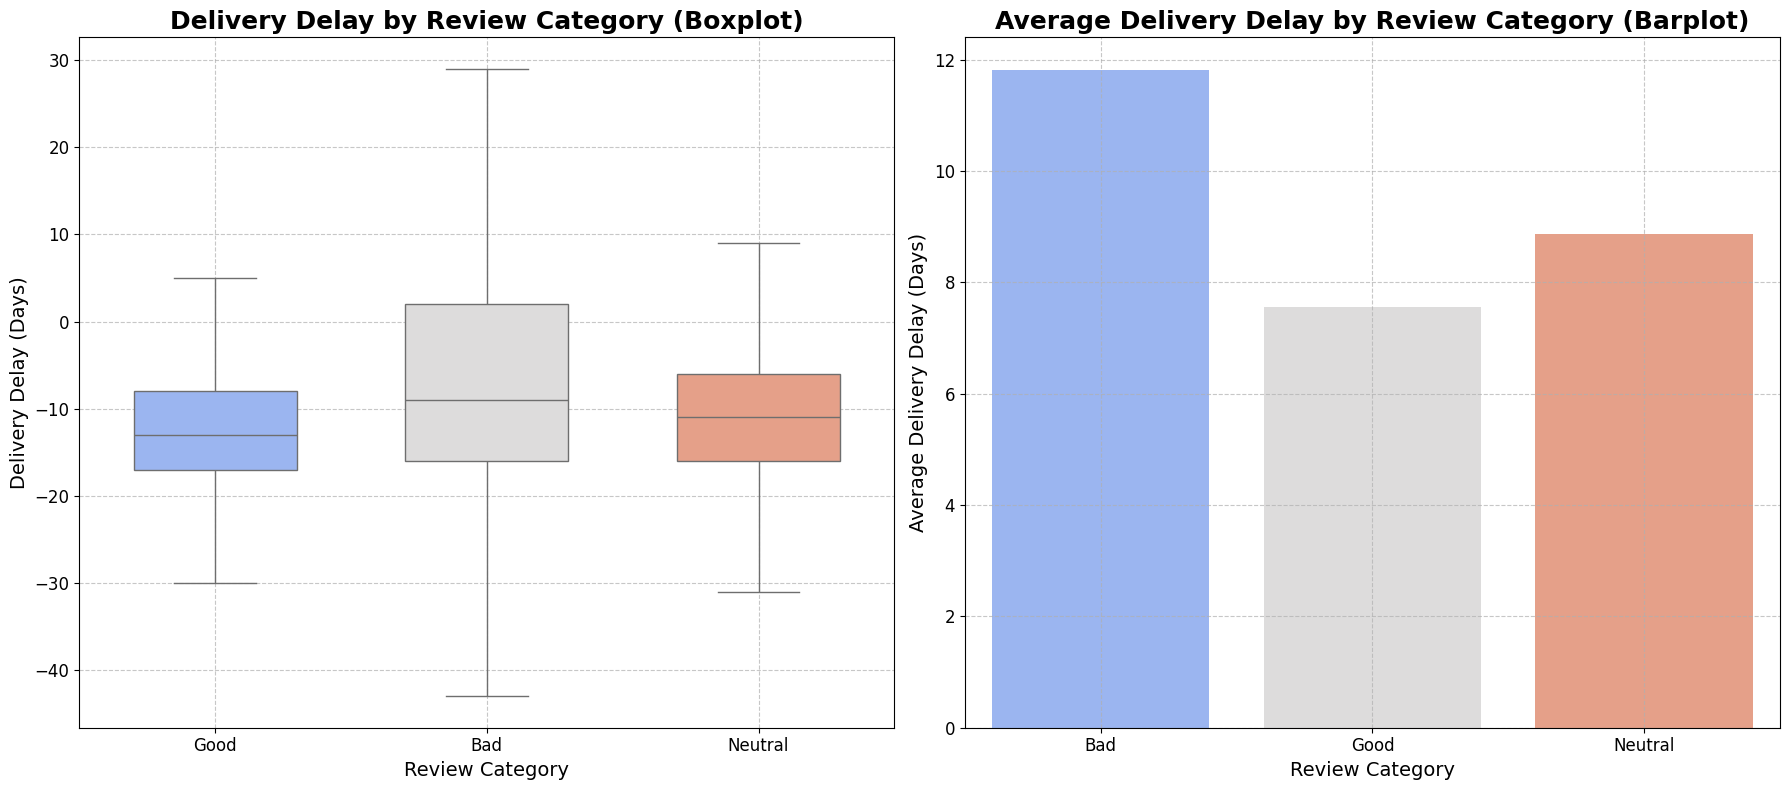

In [ ]:
# 1. Delivery Delay by Customer Review (Boxplot and Barplot)
# Categorical vs Continuous --> Barplot, Boxplot --> Relation | Pie chart --> Proportion

# Analysis --> Lesser used Continuous vs Continuous | Categorise the continuous --> easier to interpret
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Boxplot on the left
sns.boxplot(x='review_category', y='delivery_delay', data=df_subset, palette='coolwarm', showfliers=False, width=0.6, ax=axes[0])
axes[0].set_title('Delivery Delay by Review Category (Boxplot)', fontsize=18, fontweight='bold')
axes[0].set_ylabel('Delivery Delay (Days)', fontsize=14)
axes[0].set_xlabel('Review Category', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(visible=True, linestyle='--', alpha=0.7)

# Barplot on the right
sns.barplot(x='review_category', y='delivery_delay', data=df_subset[df_subset['delivery_delay']>0], palette='coolwarm', ci=None, ax=axes[1])
axes[1].set_title('Average Delivery Delay by Review Category (Barplot)', fontsize=18, fontweight='bold')
axes[1].set_ylabel('Average Delivery Delay (Days)', fontsize=14)
axes[1].set_xlabel('Review Category', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].grid(visible=True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

"""
🔍 **Observations:**
- Orders with **Bad reviews** tend to have significantly higher average delivery delays.
- The median delay for 'Bad' reviews is notably higher compared to 'Good' and 'Neutral' reviews, as seen in the boxplot.

📊 **Interpretations:**
- Late deliveries are a **major factor** in customer dissatisfaction, leading to more negative reviews.
- This indicates that **timeliness** is a critical driver of customer satisfaction.

🚀 **Implications:**
- Focus on **reducing delivery delays** to improve overall customer experience.
- Implement better **logistics planning** and **real-time tracking** to reduce late deliveries.
- Use predictive analytics to **identify potential delays** before they occur.
"""

##### Processing Time and Review

In [ ]:
# Processing Time --> When Order was purchased to when it was approved

In [ ]:
df_subset['processing_time'].describe()

,processing_time
count,108068.000000
mean,0.271394
std,0.750183
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,30.000000


In [ ]:
df_subset['processing_time'].quantile(0.90)

np.float64(1.0)

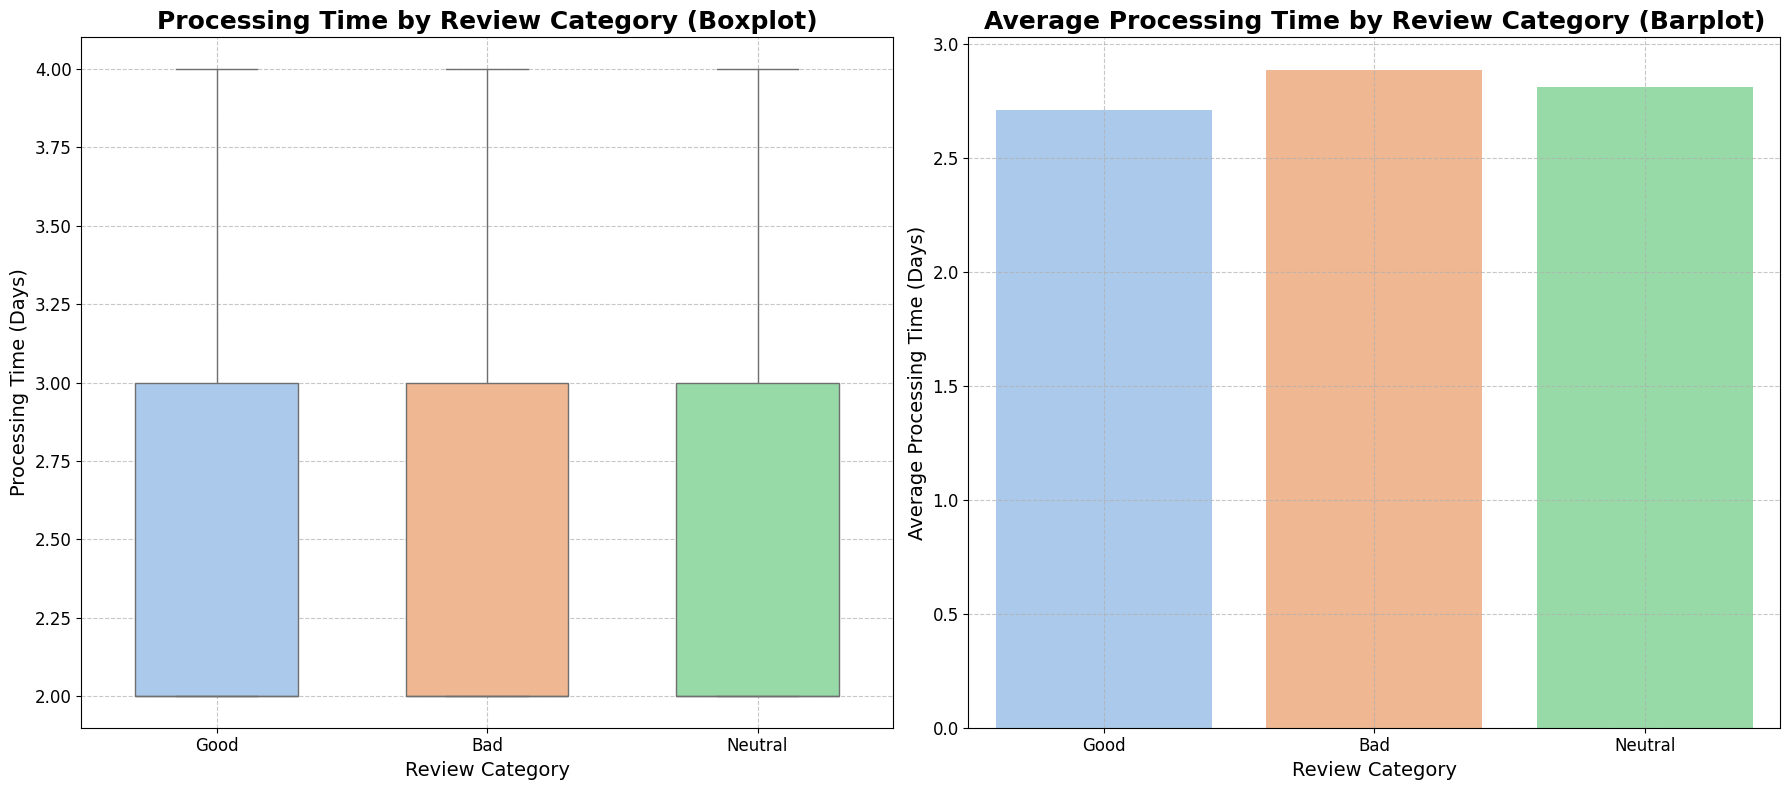

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Boxplot on the left
sns.boxplot(x='review_category', y='processing_time', data=df_subset[df_subset['processing_time']>1], palette='pastel', showfliers=False, width=0.6, ax=axes[0])
axes[0].set_title('Processing Time by Review Category (Boxplot)', fontsize=18, fontweight='bold')
axes[0].set_ylabel('Processing Time (Days)', fontsize=14)
axes[0].set_xlabel('Review Category', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(visible=True, linestyle='--', alpha=0.7)

# Barplot on the right
sns.barplot(x='review_category', y='processing_time', data=df_subset[df_subset['processing_time']>1], palette='pastel', ci=None, ax=axes[1])
axes[1].set_title('Average Processing Time by Review Category (Barplot)', fontsize=18, fontweight='bold')
axes[1].set_ylabel('Average Processing Time (Days)', fontsize=14)
axes[1].set_xlabel('Review Category', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].grid(visible=True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

🔍 **Observations:**
- Orders with **Good reviews** generally have shorter processing times.


📊 **Interpretations:**
- Faster order approvals contribute to **better customer experiences** and **higher satisfaction**.
- Inconsistent processing times can lead to **unpredictable delivery experiences**, hurting customer trust.

🚀 **Implications:**
- Streamline **order processing workflows** to reduce delays.
- Use automated systems to minimize human errors and bottlenecks.
- Set clear **SLA targets** for order approvals to standardize processing times.

##### Freight Value vs Review

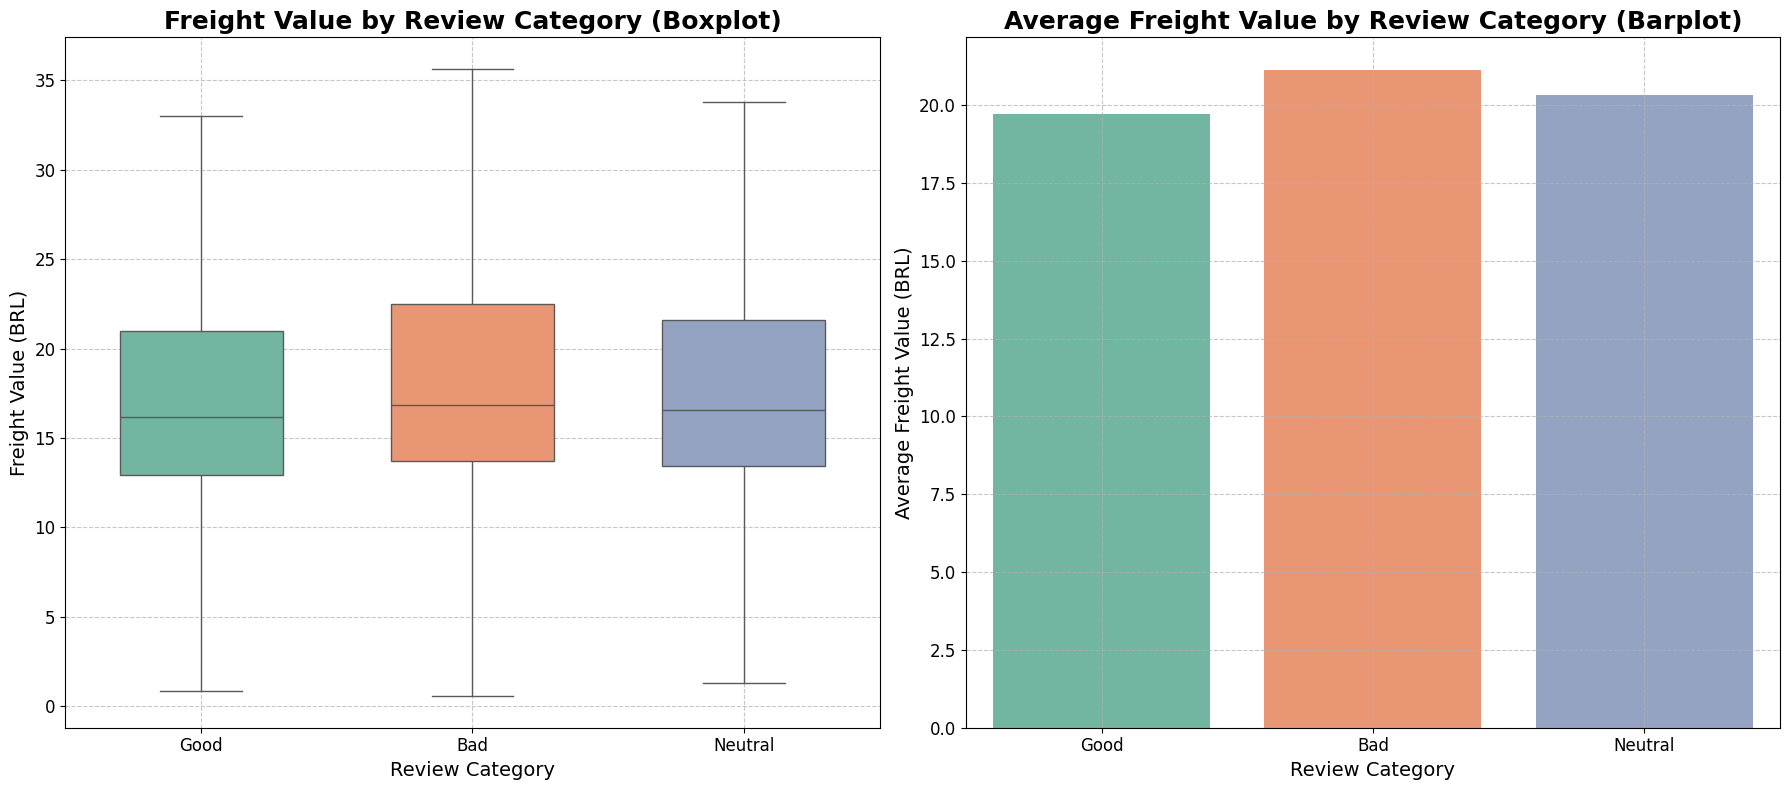

In [ ]:
# 3. Boxplot: Delivery Delay vs Review Score
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Boxplot on the left
sns.boxplot(x='review_category', y='freight_value', data=df_subset, palette='Set2', showfliers=False, width=0.6, ax=axes[0])
axes[0].set_title('Freight Value by Review Category (Boxplot)', fontsize=18, fontweight='bold')
axes[0].set_ylabel('Freight Value (BRL)', fontsize=14)
axes[0].set_xlabel('Review Category', fontsize=14)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(visible=True, linestyle='--', alpha=0.7)

# Barplot on the right
sns.barplot(x='review_category', y='freight_value', data=df_subset, palette='Set2', ci=None, ax=axes[1])
axes[1].set_title('Average Freight Value by Review Category (Barplot)', fontsize=18, fontweight='bold')
axes[1].set_ylabel('Average Freight Value (BRL)', fontsize=14)
axes[1].set_xlabel('Review Category', fontsize=14)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].grid(visible=True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

🔍 **Observations:**
- Freight value does not show a clear correlation with review scores.
- Both **Good** and **Bad** reviews have a wide range of freight values.

📊 **Interpretations:**
- Customers are likely more sensitive to **delivery speed** and **accuracy** than to shipping costs.
- High freight costs alone do not appear to drive negative reviews.

🚀 **Implications:**
- Focus on **faster, reliable delivery** rather than just reducing shipping costs.
- Consider offering **free shipping** for high-value items or loyal customers to enhance satisfaction.

##### Multivariate Analysis

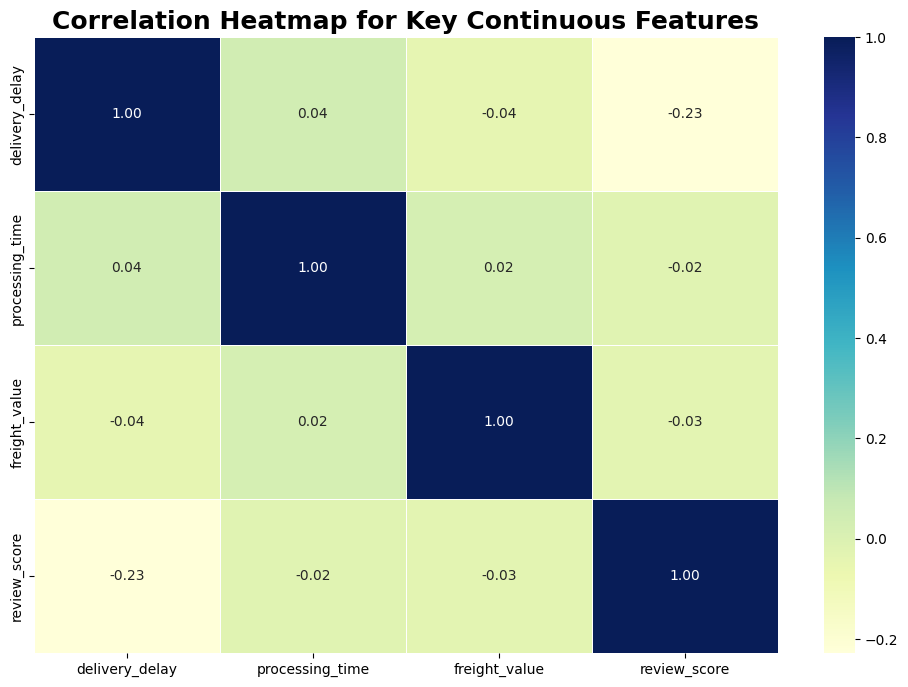

In [ ]:
# Correlation Heatmap for Key Continuous Features
plt.figure(figsize=(12, 8))
correlation_matrix = df_subset[['delivery_delay', 'processing_time', 'freight_value', 'review_score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Key Continuous Features', fontsize=18, fontweight='bold')
plt.show()
# +ve Value of Correlation : Directly Proportional
# -ve value : Inversely Proportional

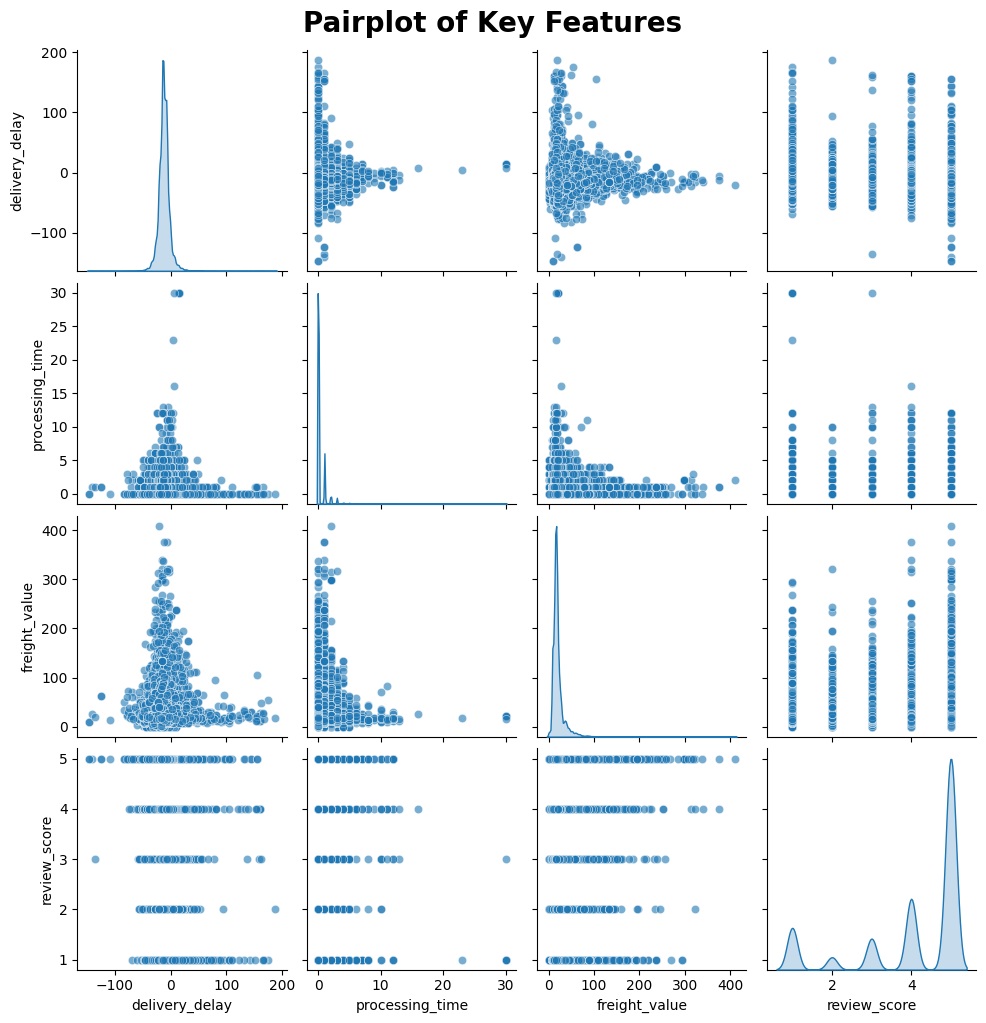

In [ ]:
# Pairplot for Detailed Continuous Relationships
sns.pairplot(df_subset[['delivery_delay', 'processing_time', 'freight_value', 'review_score']], diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Pairplot of Key Features', y=1.02, fontsize=20, fontweight='bold')
plt.show()


🔍 **Observations:**
- The heatmap indicates a moderate negative correlation between **processing time** and **review score**, suggesting that faster processing generally leads to better reviews.
- **Freight value** has a weak correlation with review score, reinforcing our earlier finding that cost is less critical than speed.
- **Delivery delay** is also negatively correlated with review score, confirming its significant impact on customer satisfaction.

📊 **Interpretations:**
- Faster processing and shorter delivery delays are the strongest drivers of customer satisfaction among continuous features.
- Freight costs have a relatively minor impact, suggesting that customers prioritize speed over cost.

🚀 **Implications:**
- Focus on reducing **processing times** and **delivery delays** to significantly improve customer satisfaction.
- Consider pricing strategies that emphasize speed and reliability over cost reductions.
- Explore advanced machine learning models to predict customer satisfaction based on these continuous variables.

#### Factors/ Causes of the Problem Statement

##### Specific seller vs Delivery delay | Processing Time | Freight Value

In [ ]:
seller_metrics.head()

,delivery_delay,processing_time,freight_value
seller_id,,,
df683dfda87bf71ac3fc63063fba369d,167.0,0.0,16.050000
8e670472e453ba34a379331513d6aab1,35.0,0.0,108.960000
8629a7efec1aab257e58cda559f03ba7,33.0,0.0,18.890000
4fb41dff7c50136976d1a5cf004a42e2,33.0,0.0,22.256667
8d92f3ea807b89465643c219455e7369,27.0,0.0,26.710000


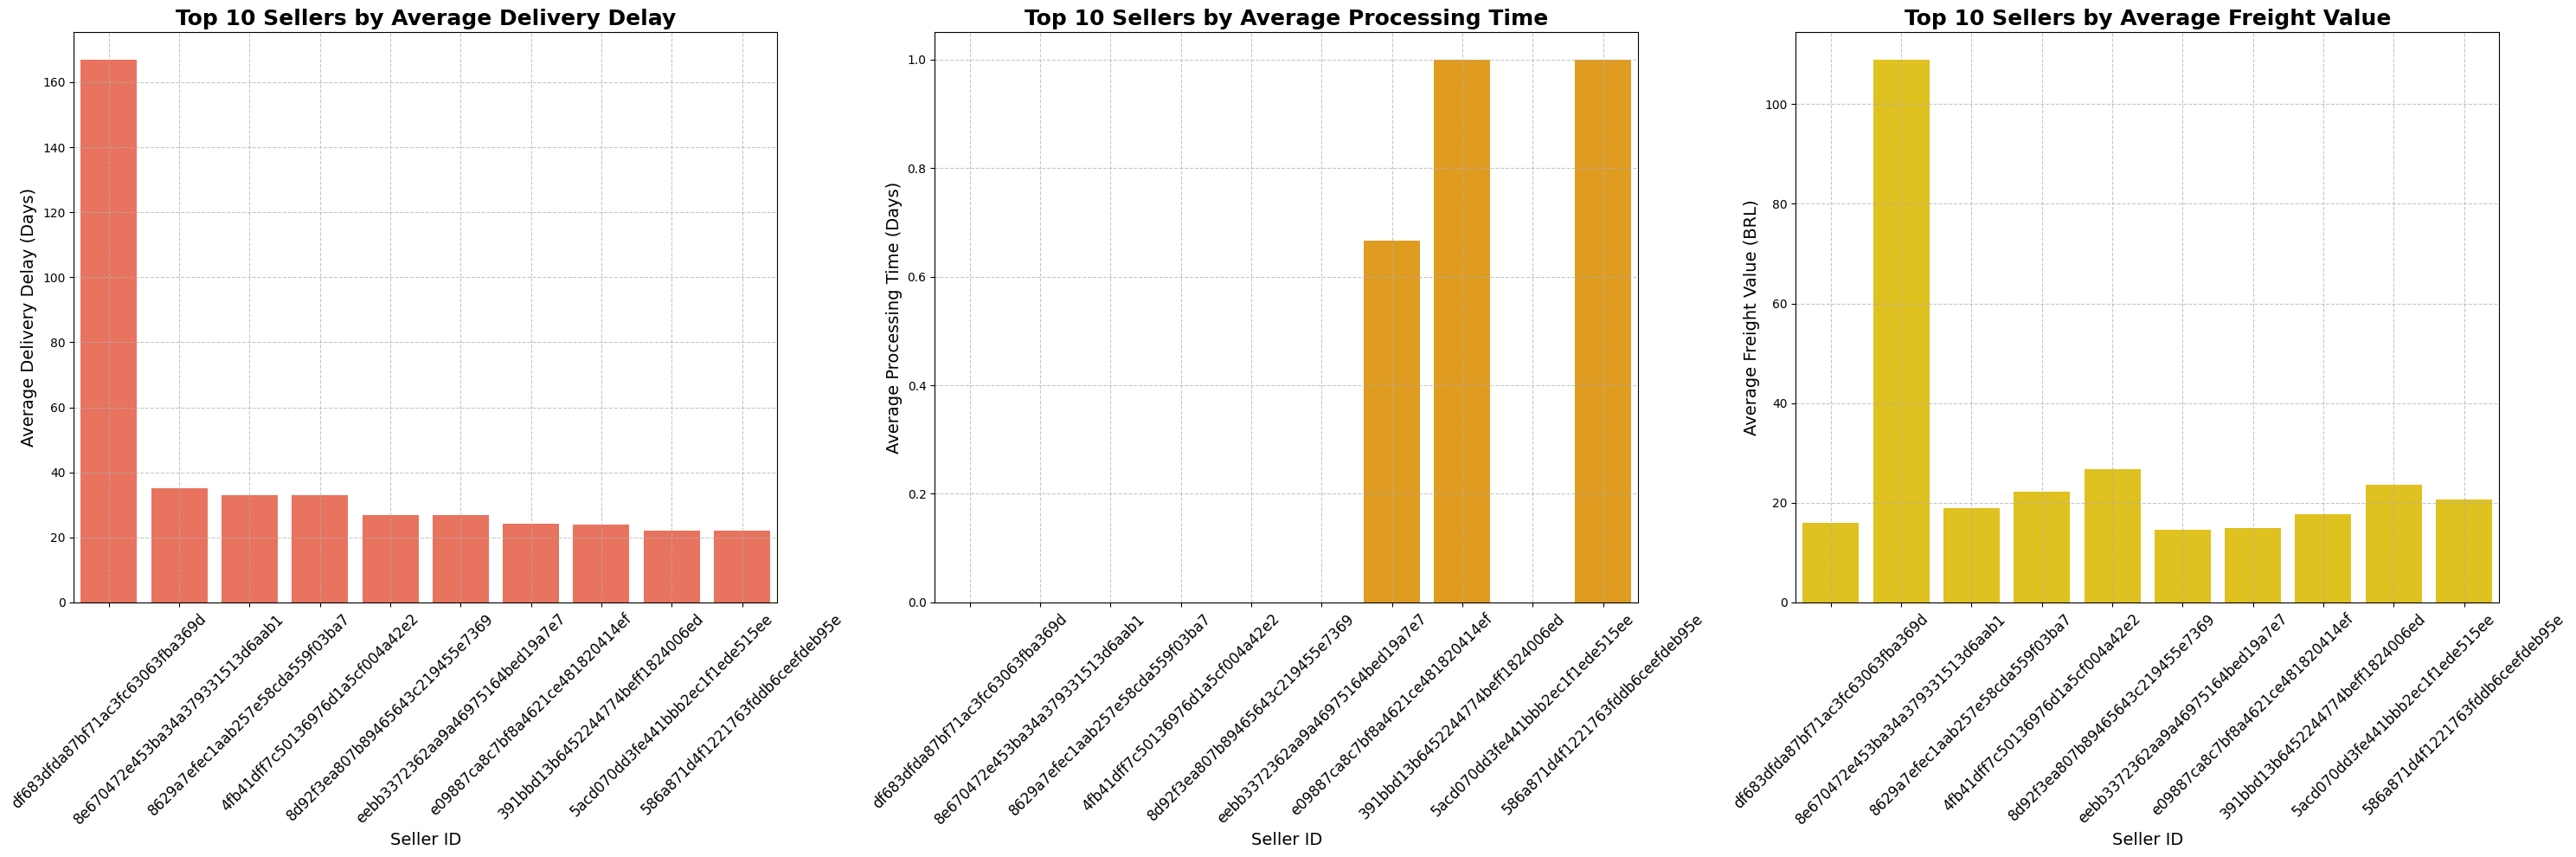

In [ ]:
# 1. Seller vs Delivery Metrics
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
seller_metrics = df_subset.groupby('seller_id')[['delivery_delay', 'processing_time', 'freight_value']].mean().sort_values(by='delivery_delay', ascending=False).head(10)

# Delivery Delay
sns.barplot(x=seller_metrics.index, y=seller_metrics['delivery_delay'], ax=axes[0], color='tomato')
axes[0].set_title('Top 10 Sellers by Average Delivery Delay', fontsize=18, fontweight='bold')
axes[0].set_xlabel('Seller ID', fontsize=14)
axes[0].set_ylabel('Average Delivery Delay (Days)', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].grid(visible=True, linestyle='--', alpha=0.7)

# Processing Time
sns.barplot(x=seller_metrics.index, y=seller_metrics['processing_time'], ax=axes[1], color='orange')
axes[1].set_title('Top 10 Sellers by Average Processing Time', fontsize=18, fontweight='bold')
axes[1].set_xlabel('Seller ID', fontsize=14)
axes[1].set_ylabel('Average Processing Time (Days)', fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].grid(visible=True, linestyle='--', alpha=0.7)

# Freight Value
sns.barplot(x=seller_metrics.index, y=seller_metrics['freight_value'], ax=axes[2], color='gold')
axes[2].set_title('Top 10 Sellers by Average Freight Value', fontsize=18, fontweight='bold')
axes[2].set_xlabel('Seller ID', fontsize=14)
axes[2].set_ylabel('Average Freight Value (BRL)', fontsize=14)
axes[2].tick_params(axis='x', rotation=45, labelsize=12)
axes[2].grid(visible=True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Observations:**

Some sellers have significantly higher average delivery delays, with peaks in processing time and freight value.

Certain sellers consistently have longer delays and higher costs, potentially impacting customer satisfaction.

**Interpretations:**

Sellers with longer processing times may struggle with inventory management or order fulfillment.

High freight values might indicate poor location choices, inefficient packaging, or costlier logistics.

**Implications:**

Identify and address sellers with repeated delays.

Negotiate better shipping rates or explore localized warehousing to reduce costs.

Implement performance-based seller incentives or penalties.

#####  Customer City vs Delivery Metrics | Processing Time | Freight Value

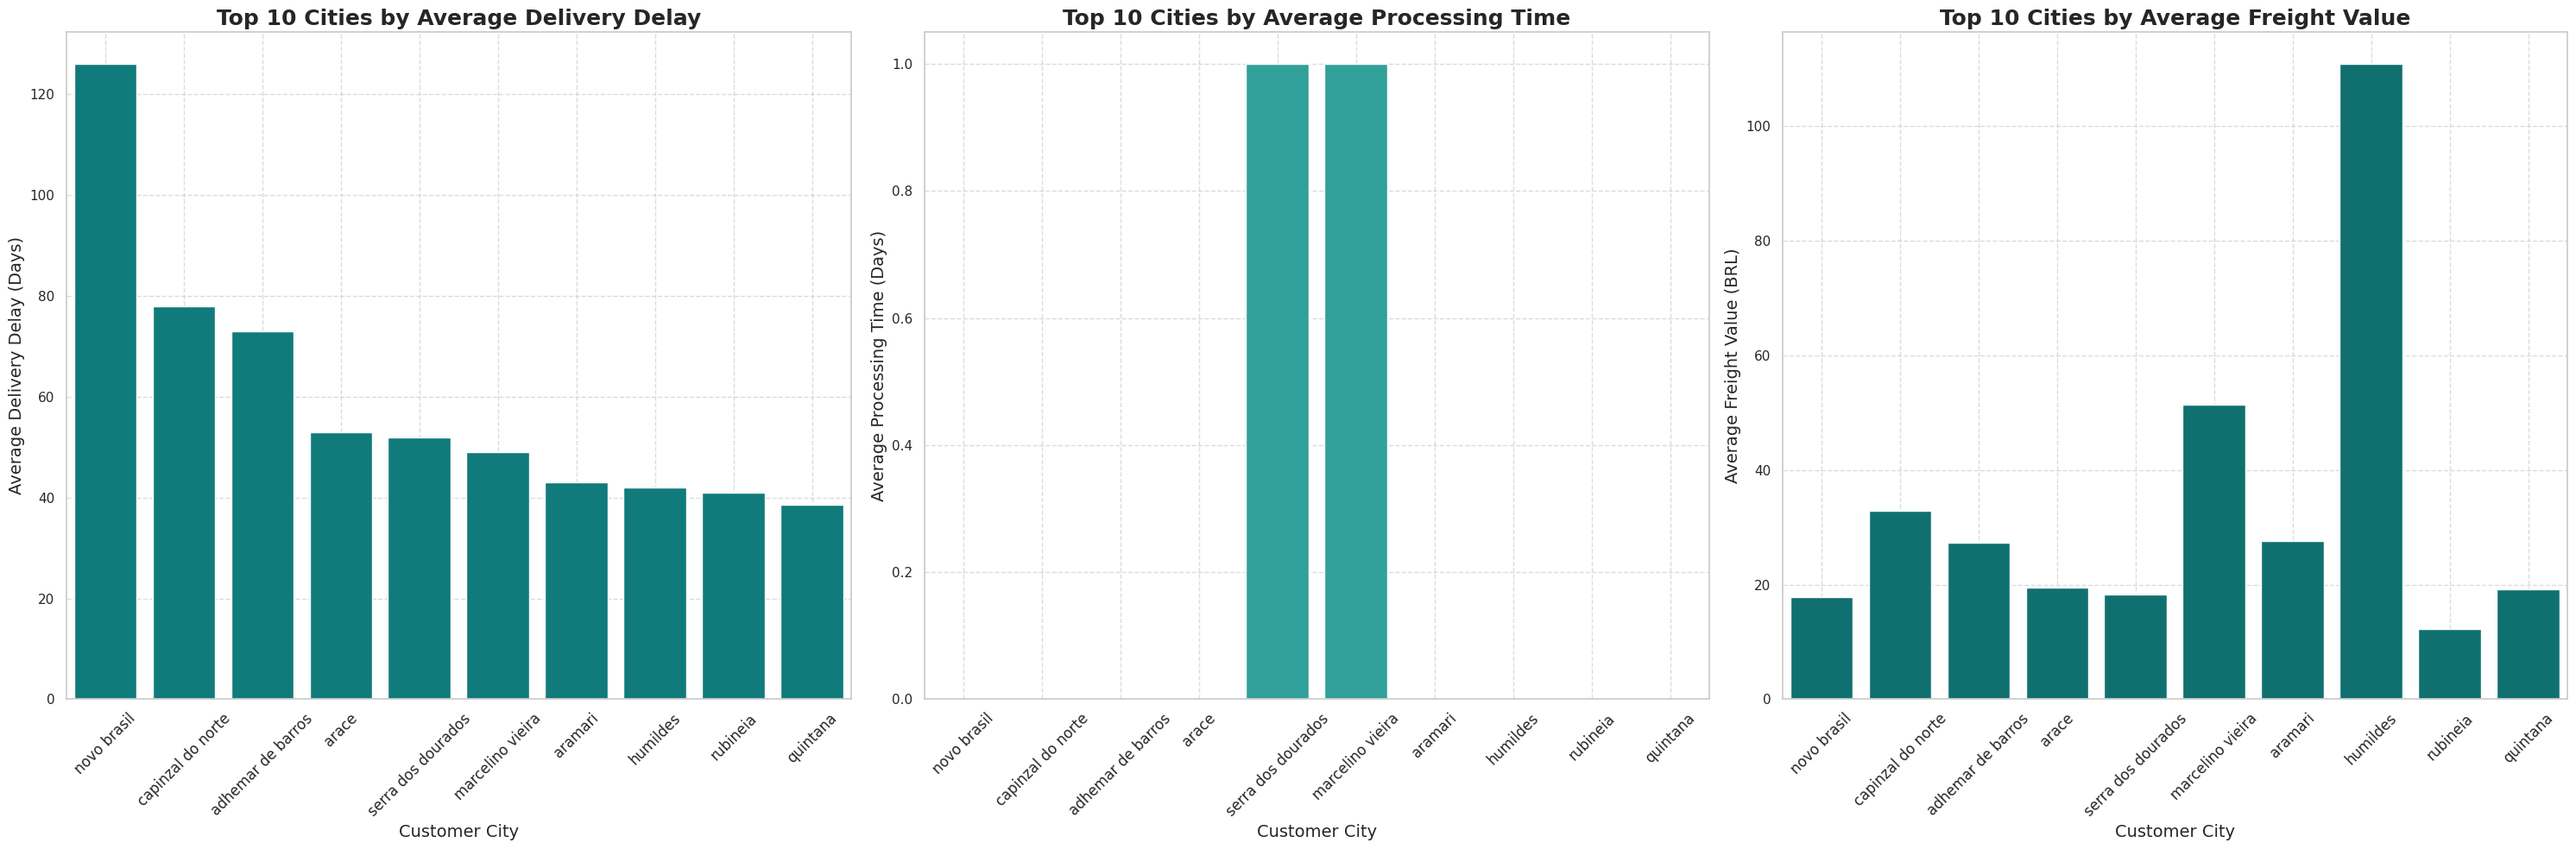

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
city_metrics = df_subset.groupby('customer_city')[['delivery_delay', 'processing_time', 'freight_value']].mean().sort_values(by='delivery_delay', ascending=False).head(10)

# Delivery Delay
sns.barplot(x=city_metrics.index, y=city_metrics['delivery_delay'], ax=axes[0], color='darkcyan')
axes[0].set_title('Top 10 Cities by Average Delivery Delay', fontsize=18, fontweight='bold')
axes[0].set_xlabel('Customer City', fontsize=14)
axes[0].set_ylabel('Average Delivery Delay (Days)', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].grid(visible=True, linestyle='--', alpha=0.7)

# Processing Time
sns.barplot(x=city_metrics.index, y=city_metrics['processing_time'], ax=axes[1], color='lightseagreen')
axes[1].set_title('Top 10 Cities by Average Processing Time', fontsize=18, fontweight='bold')
axes[1].set_xlabel('Customer City', fontsize=14)
axes[1].set_ylabel('Average Processing Time (Days)', fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].grid(visible=True, linestyle='--', alpha=0.7)

# Freight Value
sns.barplot(x=city_metrics.index, y=city_metrics['freight_value'], ax=axes[2], color='teal')
axes[2].set_title('Top 10 Cities by Average Freight Value', fontsize=18, fontweight='bold')
axes[2].set_xlabel('Customer City', fontsize=14)
axes[2].set_ylabel('Average Freight Value (BRL)', fontsize=14)
axes[2].tick_params(axis='x', rotation=45, labelsize=12)
axes[2].grid(visible=True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Observations:**

Some cities consistently experience higher delivery delays and processing times, suggesting regional logistical challenges.

Freight costs also vary significantly by city, indicating different shipping dynamics.

**Interpretations:**

Cities with high delays might have infrastructure issues or longer transit routes.

Higher freight costs in some cities may be due to remote locations or lower shipping volumes.

**Implications:**

Consider regional distribution centers to reduce transit times.

Use data-driven route optimization to improve delivery speeds.

Focus marketing efforts on regions with consistently high delays to preempt customer dissatisfaction.

##### Product vs Delivery Metrics | Processing Time | Freight Value

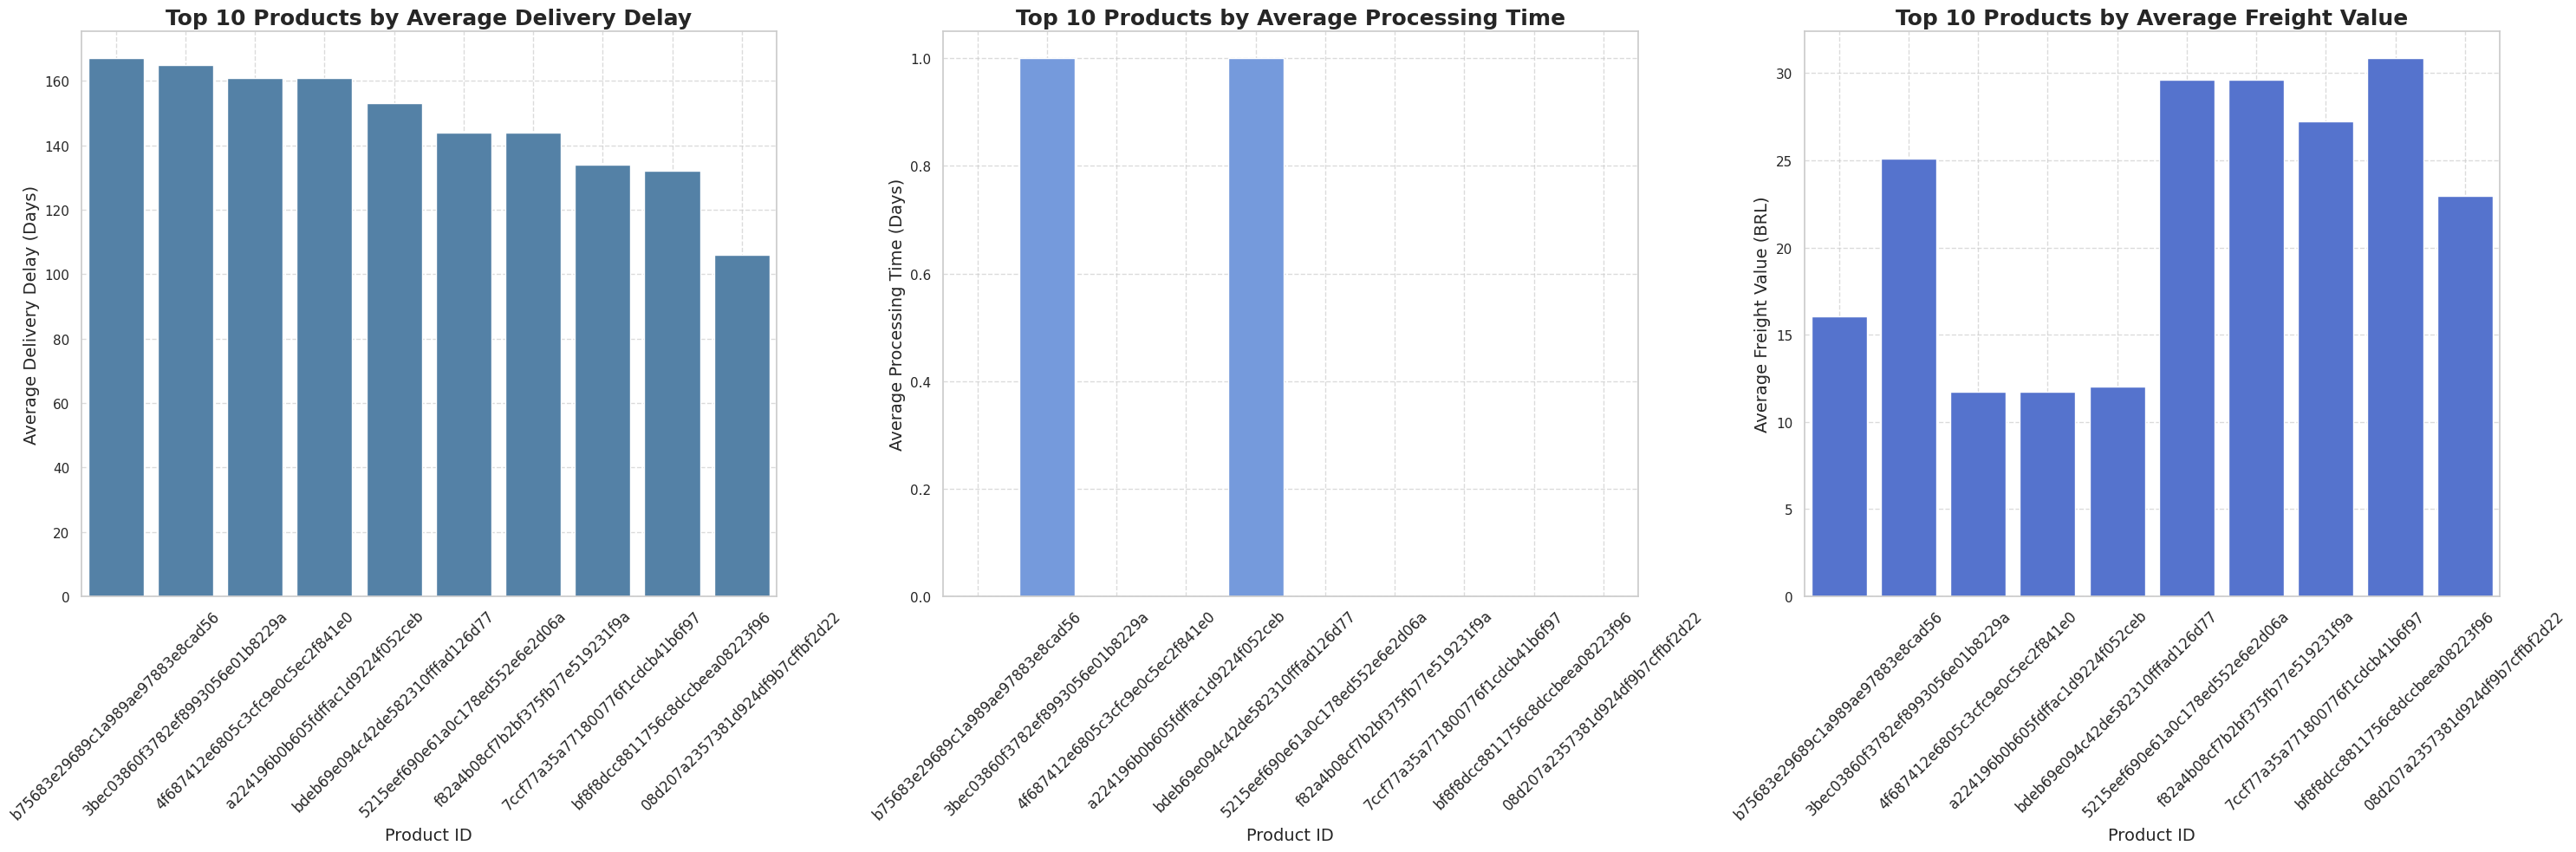

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
product_metrics = df_subset.groupby('product_id')[['delivery_delay', 'processing_time', 'freight_value']].mean().sort_values(by='delivery_delay', ascending=False).head(10)

# Delivery Delay
sns.barplot(x=product_metrics.index, y=product_metrics['delivery_delay'], ax=axes[0], color='steelblue')
axes[0].set_title('Top 10 Products by Average Delivery Delay', fontsize=18, fontweight='bold')
axes[0].set_xlabel('Product ID', fontsize=14)
axes[0].set_ylabel('Average Delivery Delay (Days)', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].grid(visible=True, linestyle='--', alpha=0.7)

# Processing Time
sns.barplot(x=product_metrics.index, y=product_metrics['processing_time'], ax=axes[1], color='cornflowerblue')
axes[1].set_title('Top 10 Products by Average Processing Time', fontsize=18, fontweight='bold')
axes[1].set_xlabel('Product ID', fontsize=14)
axes[1].set_ylabel('Average Processing Time (Days)', fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].grid(visible=True, linestyle='--', alpha=0.7)

# Freight Value
sns.barplot(x=product_metrics.index, y=product_metrics['freight_value'], ax=axes[2], color='royalblue')
axes[2].set_title('Top 10 Products by Average Freight Value', fontsize=18, fontweight='bold')
axes[2].set_xlabel('Product ID', fontsize=14)
axes[2].set_ylabel('Average Freight Value (BRL)', fontsize=14)
axes[2].tick_params(axis='x', rotation=45, labelsize=12)
axes[2].grid(visible=True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Observations:**

Certain products have consistently longer delivery delays, higher processing times, and higher freight values.

These products might be bulkier, more fragile, or sourced from distant suppliers.

**Interpretations:**

High freight values may indicate poor packaging efficiency or higher weight/volume, increasing shipping costs.

Longer processing times could be a sign of complex manufacturing or customization requirements.

**Implications:**

Consider redesigning packaging for better shipping efficiency.

Partner with suppliers for faster manufacturing cycles.

Use predictive analytics to optimize inventory for these high-delay products.

In [ ]:
# Product Category
# Seller City

#....

### Conclusion

🔍 **Summarize Key Findings**

1. **Delivery Delay by Review Category**  
   - Orders with **bad reviews** tend to have significantly higher average delivery delays, as shown in the boxplot and barplot.  
   - The median delay for **bad reviews** is much higher than for **good** or **neutral** reviews, indicating that **timeliness** is a critical factor for customer satisfaction.  

2. **Processing Time by Review Category**  
   - Faster processing times are clearly linked with **better customer reviews**, as evident in the shorter median processing times for **good reviews**.  
   - Inconsistent processing times can lead to unpredictable delivery experiences, impacting customer trust.  

3. **Freight Value by Review Category**  
   - Freight value does not show a strong correlation with review scores.  
   - Both **good** and **bad** reviews have a wide range of freight values, suggesting that customers are more sensitive to **delivery speed** and **order accuracy** than to shipping costs.  

4. **Causes of the Problem**  
   - Certain sellers, cities, and products consistently experience **higher delivery delays**, impacting customer satisfaction.  
   - Orders with longer processing times tend to have **lower review scores**.  
   - High freight costs do not necessarily correlate with bad reviews, indicating that customers are more sensitive to delays than costs.  

🧠 **Business Interpretation**  
- **Late Deliveries Drive Dissatisfaction:**  
  Customers are particularly sensitive to delays, making it essential to prioritize **on-time delivery** for a better customer experience.  
- **Processing Speed Matters beyond a certain Point:**  
  Orders processed quickly are more likely to receive positive reviews, highlighting the importance of efficient operations.  
- **Cost vs. Speed:**  
  High shipping costs alone do not drive negative reviews, meaning businesses should focus on **speed and reliability** over mere cost reductions.  

🚀 **Suggested Actions and Further Questions**  
- **Reduce Delays:**  
  Focus on **reducing delivery delays** through better logistics planning, proactive tracking, and predictive analytics to anticipate bottlenecks.  
- **Standardize Processing:**  
  Implement **automated order processing systems** to reduce approval times and improve consistency.  
- **Strategic Freight Management:**  
  Consider **regional warehouses** and **optimized shipping** for high-demand, high-value products to reduce delivery times.  
- **Future Analysis:**  

  - Would **bundling** faster shipping with premium pricing improve overall customer satisfaction?  

#### Key Points to remember while doing Analysis
1. Define Objective
2. Factors affecting the Objective (Brainstorming/ Research/ Talk to Business Team)
3. Structure the Analysis in Categories / Right Data & key Columns (Step 3)
4. Define the Data (Time Filter, Conditions, Exclusions)
5. Check for Duplicate value

6. Check for Missing values (be vigilant about Latent/ hidden values for missing data)

-- Variable Engineering / Create new columns required for Analysis
7. EDA
  - Always think about creating percentages/ Average instead of Numbers
  - Join the External Data with base Data
    - Drop Duplicates on External Data
    - Do left with base Data
  
  - Outliers
    - Drop it if you are sure about information being wrong
    - otherwise create the flag using IDR method

  - Be Vigilant about Mean and Median for the Summarisation
  - Drill down | Root cause/ Factors on the the findings ( Got one direction further into different components) Ex - top 3 Cities for Seller --> Which seller in that city --> Which product Category
  - Derived columns : Check for if Any column can be drived to have better relation with the objective (Volume vs Individual length, breadth or height)
  -  Charts and Visualisation : Subplots across factors to make your overall analysis Concise
8. conclusion at the end.
 - Data Information - key Findings
 - Insights - Findings in different Analysis
 - Suggested Actionables


In [ ]:
# 10-15 Charts -->